In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [4]:
from clustering_comparison import *

# Draft for Paper

## Introduction

Segmentation of soft tissues is an open problem in medical imaging.

Spectral imaging remains an unexplored imaging modality for multiple reasons. Firstly the price of spectral detectors is a large barrier to the clinical implementation. Secondly the applications where spectral imaging outdoes single energy and dual energy imaging are not well defined. Although there has been much interest in spectral CT in medicine it is often seen to have only small benefits as compared with dual energy CT in the same application. 

In this work we examine spectral imaging as compared to dual and single imaging in the application of segmentation. A comparison is made of the performance of unsupervised segmentation algorithms is performed on experimental images acquired using a Redlen (redlen industries ...) spectral detector on a phantom composed of a variety of materials as well as images aquired of these same materials embedded in chicken breast.

## Methods

### Data aquisition

X-ray scans were performed on a PMMA phantom with 5 contaminates (steel, glass, plastic, polypropylene, and PFTE) as well as chicken flesh with various contaminates (bone, cartilage, fat, plastic, wood, glass, rock, steel, and aluminum).

Data was acquired using a CZT detector with a 8$\times$12 mm imaging array from Redlen Technologies. The 330 $\mu$m pitch high-flux CZT detector is 2mm thick and is able to operate at 250 $\frac{Mcps}{mm^2}$ without any signs of polarization. Travel Heat Method (THM) was adopted by Redlen Technologies when growing the CZT crystals used in the detector. These crystals were placed in a sensor that is connected to a photon counting ASIC which operates at rates of up to 62.5 $\frac{Mcps}{channel}$. This ASIC communicates with an external PC though LVDS I/Os via a programmable FPGA. The energies of photons incident with the detector are sorted into six energy bins by the ASIC. In the case of this experiment the energy bins were set to 16-33 keV, 33-41 keV, 41-50 keV, 50-90 keV, 90-120 keV, \& 120< keV.

The detector and X-ray source were both mounted on vertical and horizontal linear motion stages from Newport Corporations. These stages were oriented perpendicular to each other to allow for easy navigation while imaging the phantom, which was mounted between these two stages. The X-ray source used was a module XRS-160 from Comet Technologies. 

The PMMA phantom block as imaged in figure (1.C) was placed on the stage and the 3 smallest contaminates of each material were imaged. To image these contaminates each at different heights, the CZT detector and X-ray source were moved vertically in a uniform manner allowing for each material to be centered without any motion of the phantom block itself. Following the first round of data acquisitions a second block of 18mm PMMA was placed in front of the phantom block and images were acquired to determine the depth at which each contaminate could be visualized. 

In the case of the chicken flesh, each contaminate was able to fit in a phantom holder alongside the chicken. This block was placed on the stage and was able to be imaged in one scan per contaminate. 

Air scans were completed for each data acquisition and could then be processed using MATLAB (The Mathworks, Natick, MA) for image reconstruction and CNR calculations for each contaminate. During all scans the X-ray tube was using a cone beam operating at 1mA, 120 kV, with a 1mm focal spot. 

### Data Analysis

#### Overview

The main steps required to analyze hyperspectral images include pre-processing of data, dimensionality reduction, enhancement of spectral responses, and component detection or classification (Mahesh et al., 2015). Using this as an analog for spectral imaging similar methods are applied in this study with the exception of enhancement of spectral response as the modelling the spectral response of the CZT detector is beyond the scope of this study.

### Pre-processing of Data

After data aquisition, data pre-processing was performed using MATLAB_R2017b (The MathWorks, Natick, USA). The images were first cropped to remove the highly non-uniform edge pixels in some parts of the detector. Dead pixels were then found manually and replaced with NaN values in the image. These NaN values were then interpolated to be the average of the surrounding eight pixels. The images were then smoothed using a two dimensional gaussian filter with a standard deviation of 0.5 in an effort to reduce the noise in the image.

### Dimensional Reduction Methods

#### Principle Component Analysis

Dimensional reduction methods were applied in this work to increase class seperation and reduce noise in the data, methods were implemented in Python using sci-kit learn. The first data reduction method employed in this study was Principle Component Analysis (PCA). First introduced in PCA does an eigenvalue decomposition of the covariance matrix, sorting the eigenvectors in terms of the magnitude of their eigenvalue one finds the directions of highest variance in the data. The data is then projected into a lower dimensional orthogonal space defined by the eigenvectors with the most variance, in this case the data was reduced to two dimensions. This method results in a loss of information, however this loss of information is usually relatively small and ideally the discarded dimensions in the data amount to noise in the data. PCA can be seen in fig \ref{}. PCA is fast, linear and sees application in many domains.

#### Independant Component Analysis

Typically not used for dimension reduction but for blind source seperation, independant component analysis (ICA) is used for seperating a mixed signal into its constituent signals and is often used in audio analysis but has seen use in hyperspectral imaging \ref{}. Using ICA we frame the segmentation of the two images as a decomposition in which the image is a weighted addition of two signals. Idealy in our case these signals would be the background material (PMMA) and the contaminant.

The components $x_i$ of the images with 5 bins $\boldsymbol{x}=(x_1,\ldots,x_5)^T$ are seen to be a sum of the independent components $s_k$, $k=1,\ldots,5$:

$x_i = a_{i,1} s_1 + \cdots + a_{i,k} s_k + \cdots + a_{i,5} s_5$

where $a_{i,k}$ are the mixing weights.

Or in matrix form as $\boldsymbol{x}=\sum_{k=1}^{5} s_k \boldsymbol{a}_k$, where our image vectors $\boldsymbol{x}$ are represented by the basis vectors $\boldsymbol{a}_k=(\boldsymbol{a}_{1,k},\ldots,\boldsymbol{a}_{m,k})^T$. The basis vectors $\boldsymbol{a}_k$ form the columns of the mixing matrix $\boldsymbol{A}=(\boldsymbol{a}_1,\ldots,\boldsymbol{a}_5)$.

Putting all this together we have the matrix equation $\boldsymbol{x}=\boldsymbol{A} \boldsymbol{s}$, where $\boldsymbol{s}=(s_1,\ldots,s_5)^T$.

Given our images $\boldsymbol{x}_1,\ldots,\boldsymbol{x}_N$ of the random vector $\boldsymbol{x}$, the task is to estimate both the mixing matrix $\boldsymbol{A}$ and the sources $\boldsymbol{s}$. This is done by adaptively calculating the $\boldsymbol{w}$ vectors and setting up a cost function which maximizes the non-gaussianity of the calculated $s_k = \boldsymbol{w}^T \boldsymbol{x}$. In this paper we use the maximum likelihood estimate (MLE) algorithm for finding the unmixing matrix $W$. 

#### Maximum Likelihood Estimation

Maximum likelihood estimation (MLE) is a statistical tool for finding the values of unknown parameter that provide the best fit of some data (e.g., the extracted signals $y$) to a chosen model. In this case we have the images as our known data and we wish to find the a probability density function (pdf) of what are source signals are. We will see the use of the MLE further for fitting the gaussian mixture models.

The ML model includes a specification of a pdf, which in this case is the pdf $p_s$ of the unknown source signals $s$. Using ML ICA, the objective is to find an unmixing matrix that yields extracted signals $y = \mathbf{W}x$ with a joint pdf as similar as possible to the joint pdf $p_s$ of the unknown source signals $s$.

MLE is thus based on the assumption that if the model pdf $p_s$ and the model parameters $\mathbf{A}$ are correct then a high probability should be obtained for the data $x$ that were actually observed. Conversely, if $\mathbf{A}$ is far from the correct parameter values then a low probability of the observed data would be expected.

Using MLE, we call the probability of the observed data for a given set of model parameter values (e.g., a pdf $p_s$ and a matrix $\mathbf{A}$) the likelihood of the model parameter values given the observed data.

We define a likelihood function $\mathbf{L(W)}$ of $\mathbf{W}$:

$\mathbf{ L(W)} = p_s (\mathbf{W}x)|\det \mathbf{W}|. $

This equals to the probability density at $x$, since $s = \mathbf{W}x$.

Thus, if we wish to find a $\mathbf{W}$ that is most likely to have generated the observed mixtures $x$ from the unknown source signals $s$ with pdf $p_s$ then we need only find that $\mathbf{W}$ which maximizes the ''likelihood'' $\mathbf{L(W)}$. The unmixing matrix that maximizes equation is known as the '''MLE''' of the optimal unmixing matrix.

It is common practice to use the log ''likelihood'', because this is easier to evaluate. As the logarithm is a monotonic function, the $\mathbf{W}$ that maximizes the function $\mathbf{L(W)}$ also maximizes its logarithm $\ln \mathbf{L(W)}$. This allows us to take the logarithm of equation above, which yields the log ''likelihood'' function

$\ln \mathbf{L(W)} =\sum_{i}\sum_{t} \ln p_s(w^T_ix_t) + N\ln|\det \mathbf{W}|$

If we substitute a commonly used high-Kurtosis model pdf for the source signals $p_s = (1-\tanh(s)^2)$ then we have

$\ln \mathbf{L(W)} ={1 \over N}\sum_{i}^{M} \sum_{t}^{N}\ln(1-\tanh(w^T_i x_t )^2) + \ln |\det \mathbf{W}|$

This matrix $\mathbf{W}$ that maximizes this function is the MLE.

## ICA plot

In [3]:
vs1 = plot_results(1,0,0,mode = 'all',cinds=[0],dinds=[0],red='nmf')

FigureCanvasNbAgg()

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
vs1 = np.zeros([100,100])

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


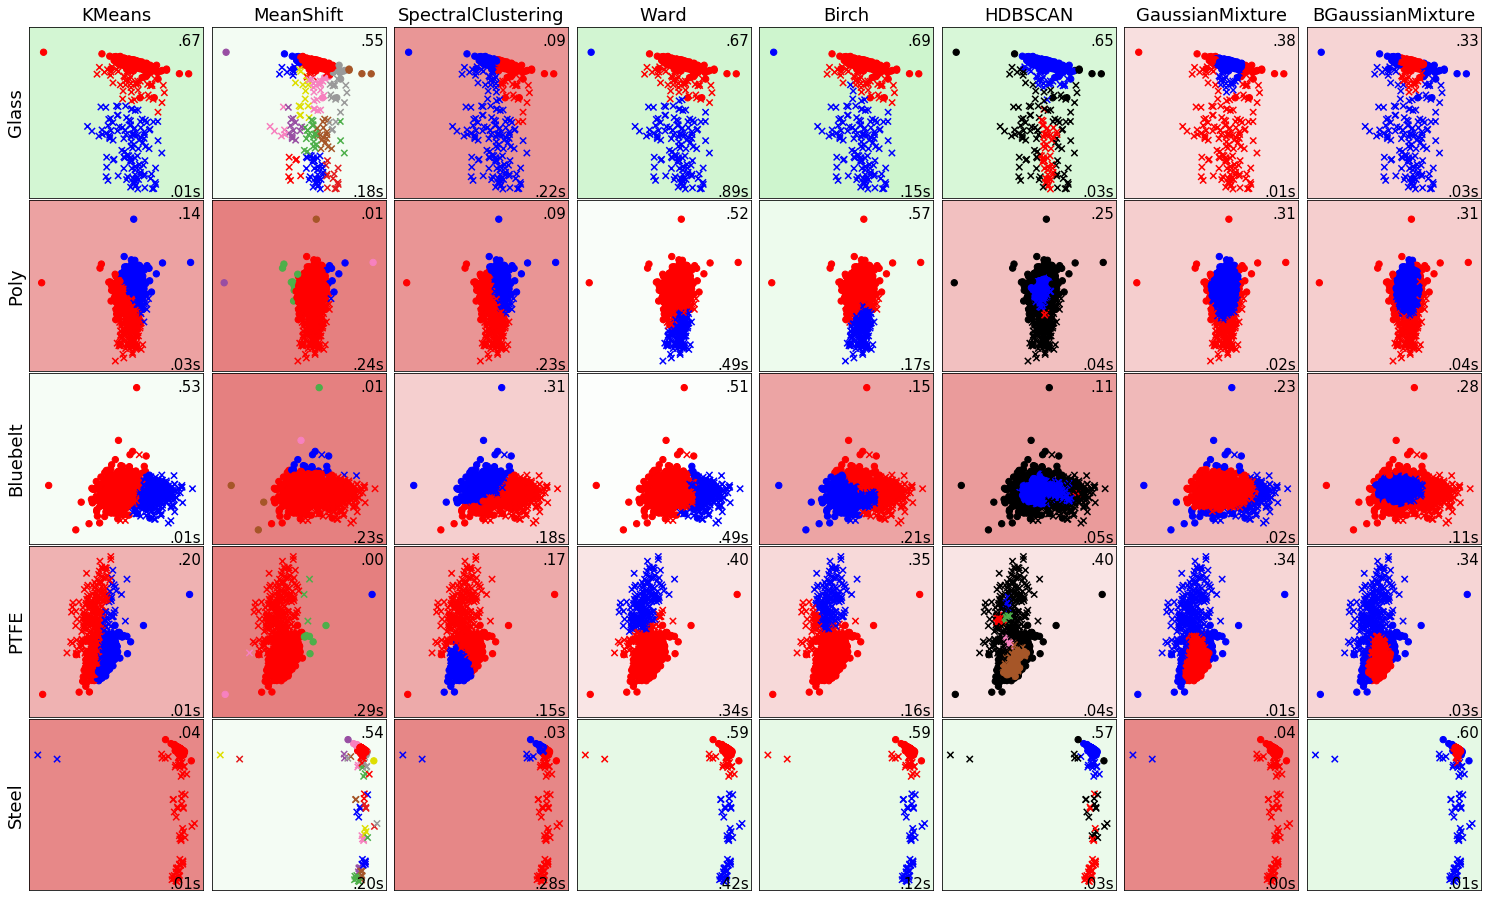

In [86]:
vs1 = plot_results(1,0,0,mode = 'all',red='ica')

## NMF plot

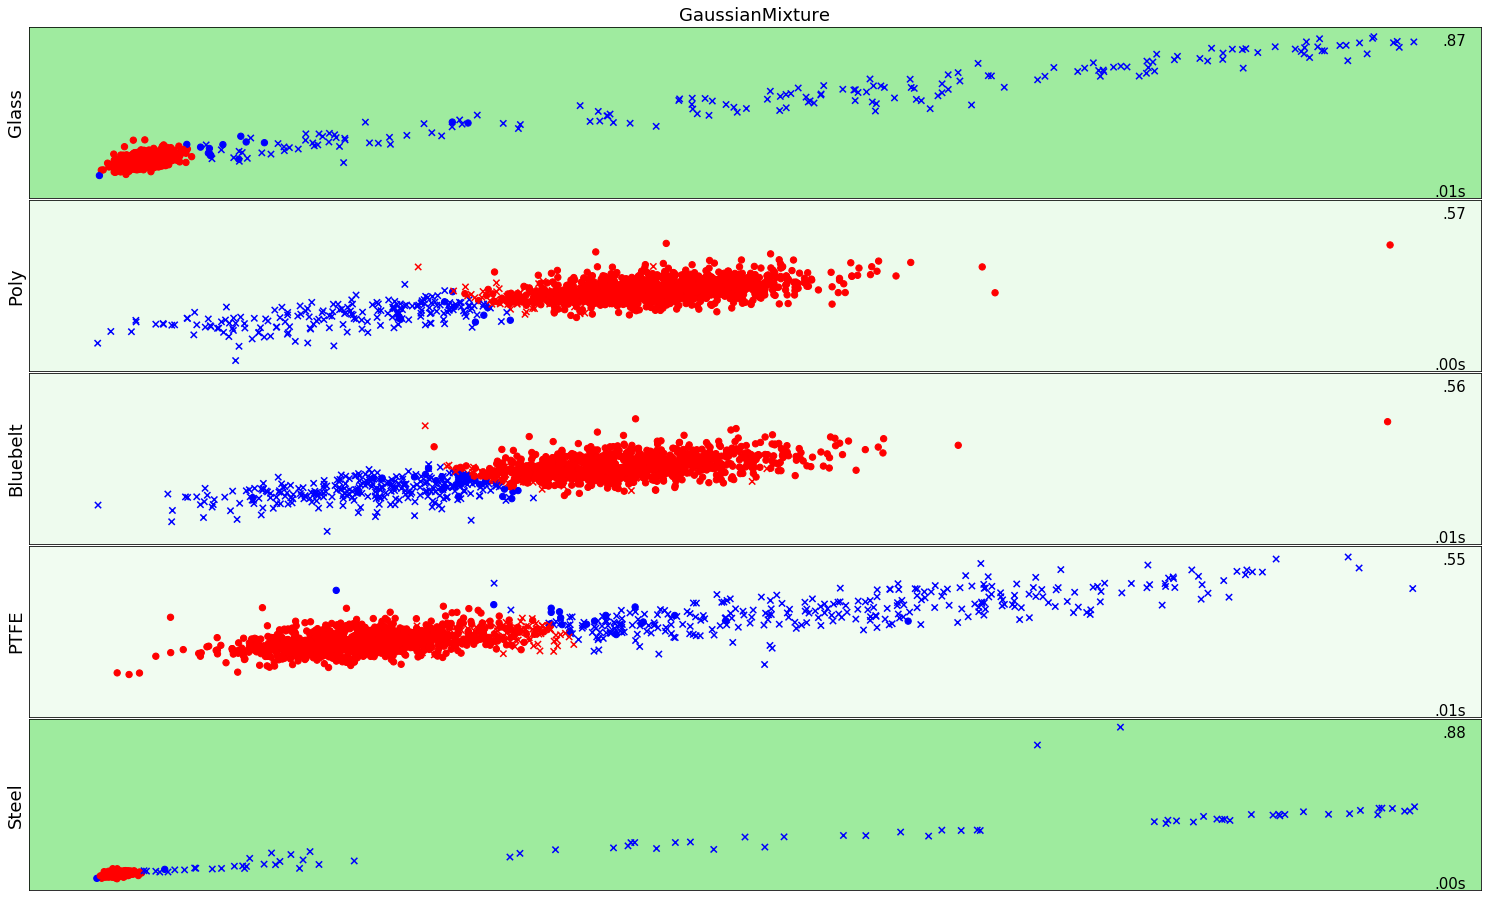

In [87]:
vs1 = plot_results(1,0,0,cinds=[9],mode='de')#,red='nmf')

## Clustering Methods

### K-means

The first clustering method implemented was k-means clustering. K-means was implemented using the k-means++ algorithm of (???). K-means was fit using a value for the number of clusters $k$ defined through the use of silhouette analysis \ref{}. Different distance metrics were used, however none of the distance metrics tried improved performance over the squared euclidean distance, thus squared euclidean distance was used as the metric. The advantage of K-means is that it is fast and relatively simple to understand.

### Guassian Mixture Models

| Method name                                                                              | Parameters                                              | Parameters Used                                                           | Geometry (metric used)                       |
| ---------------------------------------------------------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------------------------- | -------------------------------------------- |
| <span class="title-ref">K-Means \<k\_means\></span>                                      | number of clusters, disctance metric                    | 2, squared euclidean distance                                       | Distances between points                     |
| <span class="title-ref">Mean-shift \<mean\_shift\></span>                                | bandwidth                                               | estimated using sklearn estimate_bandwidth \ref{}                  | Distances between points                     |
| <span class="title-ref">Spectral clustering \<spectral\_clustering\></span>              | number of clusters, eigenvalue solver, affinity          | 2, ARPACK \ref{}, nearest neighbor                       | Graph distance (e.g. nearest-neighbor graph) |
| <span class="title-ref">Ward hierarchical clustering \<hierarchical\_clustering\></span> | number of clusters, connectivity                        | 2,                           | Distances between points                     |
| <span class="title-ref">Agglomerative clustering \<hierarchical\_clustering\></span>     | number of clusters, linkage type, distance              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| <span class="title-ref">hDBSCAN \<dbscan\></span>                                         | neighborhood size                                       | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| <span class="title-ref">Gaussian mixtures \<mixture\></span>                             | many                                                    | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| <span class="title-ref">Birch</span>                                                     | branching factor, threshold, optional global clusterer. | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |

## Results

## Comparison of different Dimensional Reduction methods

BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher
BIC got higher
BIC got higher
BIC got higher


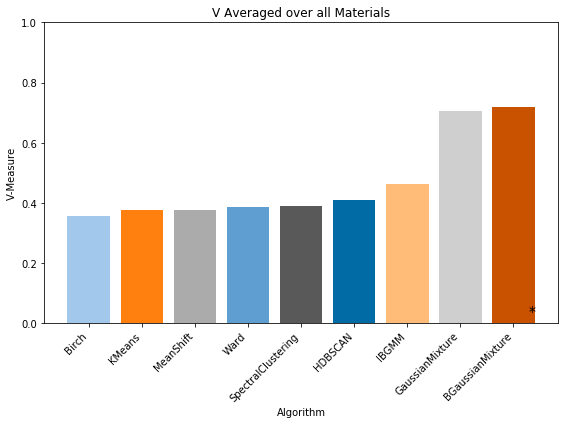

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

BIC got higher
BIC got higher
BIC got higher
BIC got higher
BIC got higher


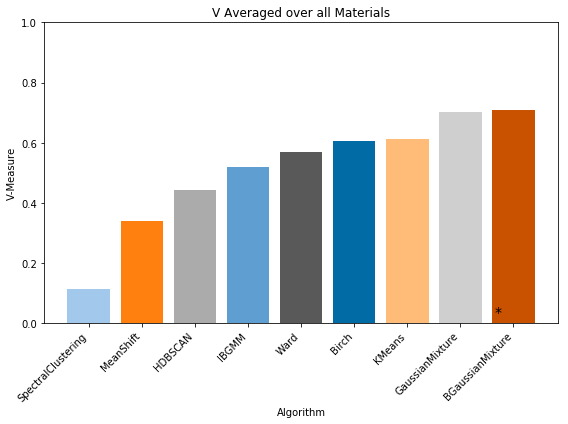

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

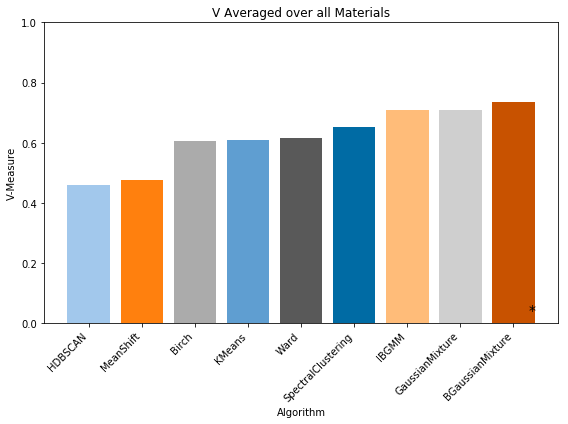

In [55]:
bars_nmf = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='gauss',red='nmf',algo_params={'ct':'full'},passred=True)
bars_ica = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='gauss',red='ica',algo_params={'ct':'full'},passred=True)
bars_pca = plot_results(0,0,0,1,return_vs=0,return_bars=1)

BIC got higher
BIC got higher
BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

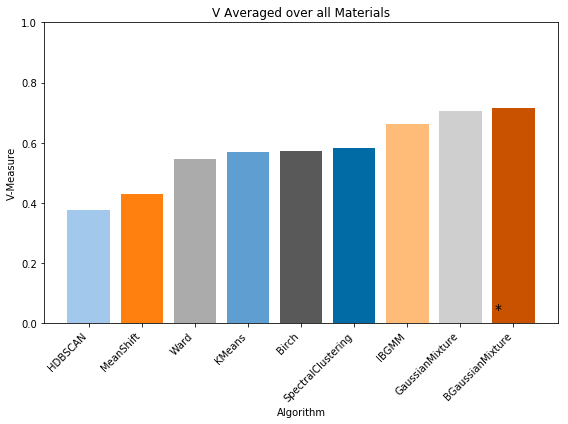

In [57]:
bars_none = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='all')

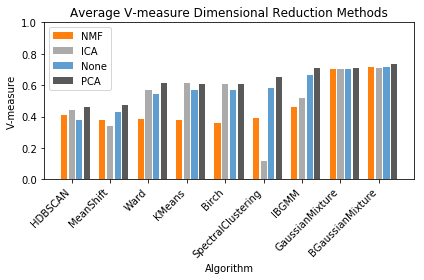

In [58]:
compare_3(bars_nmf,bars_ica,bars_none,bars_none=bars_pca,title='Average V-measure Dimensional Reduction Methods',leg=['NMF','ICA','None','PCA'],savefig=True,fname='../../clustering_figures/red_methods.png')

In [9]:
compare_3(np.vstack((np.mean(bars_nmf,axis=0),np.mean(bars_ica,axis=0),np.mean(bars_pca,axis=0))),title='Average V-measure Dimensional Reduction Methods',leg=['NMF','ICA','PCA'])

TypeError: compare_3() missing 2 required positional arguments: 'bars_de' and 'bars_pc'

As can be seen above in figure \ref{???} PCA dimensional reduction was seen to be superior averaged over all of the materials in all cases and among the algorithm examined the Gaussian Mixtures performed the best with the PCA dimensional reduction. If we look at cluster plots of the points in the clustering \ref{???}:

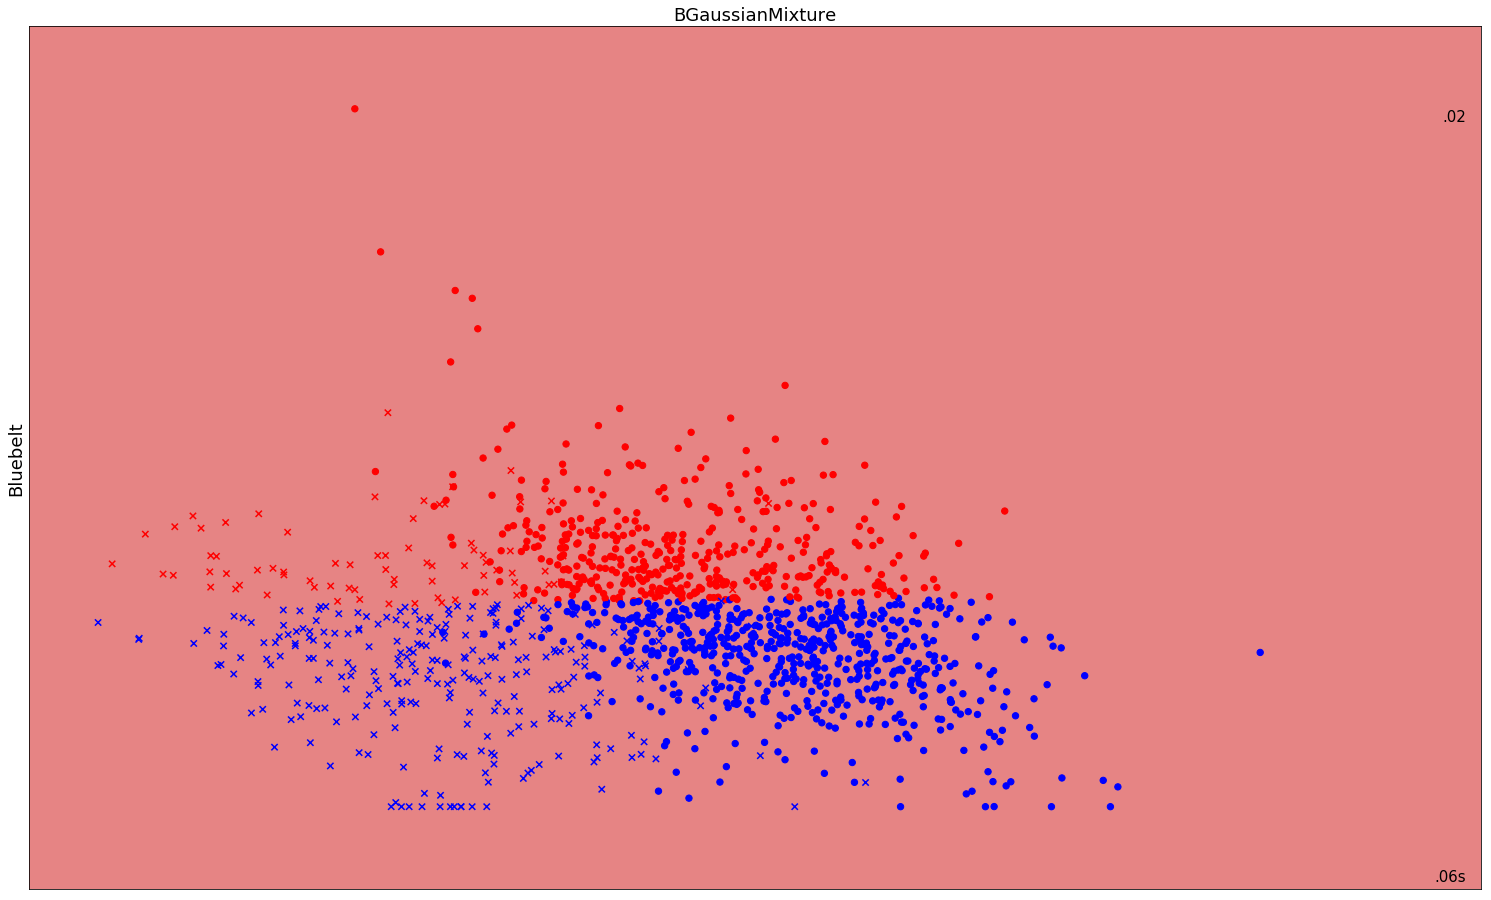

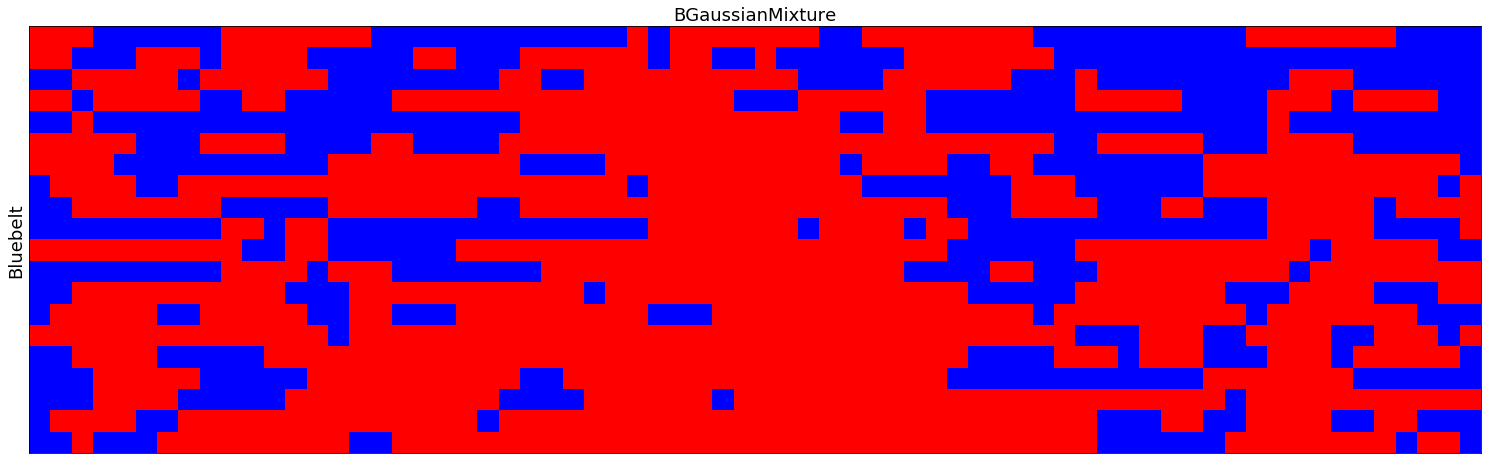

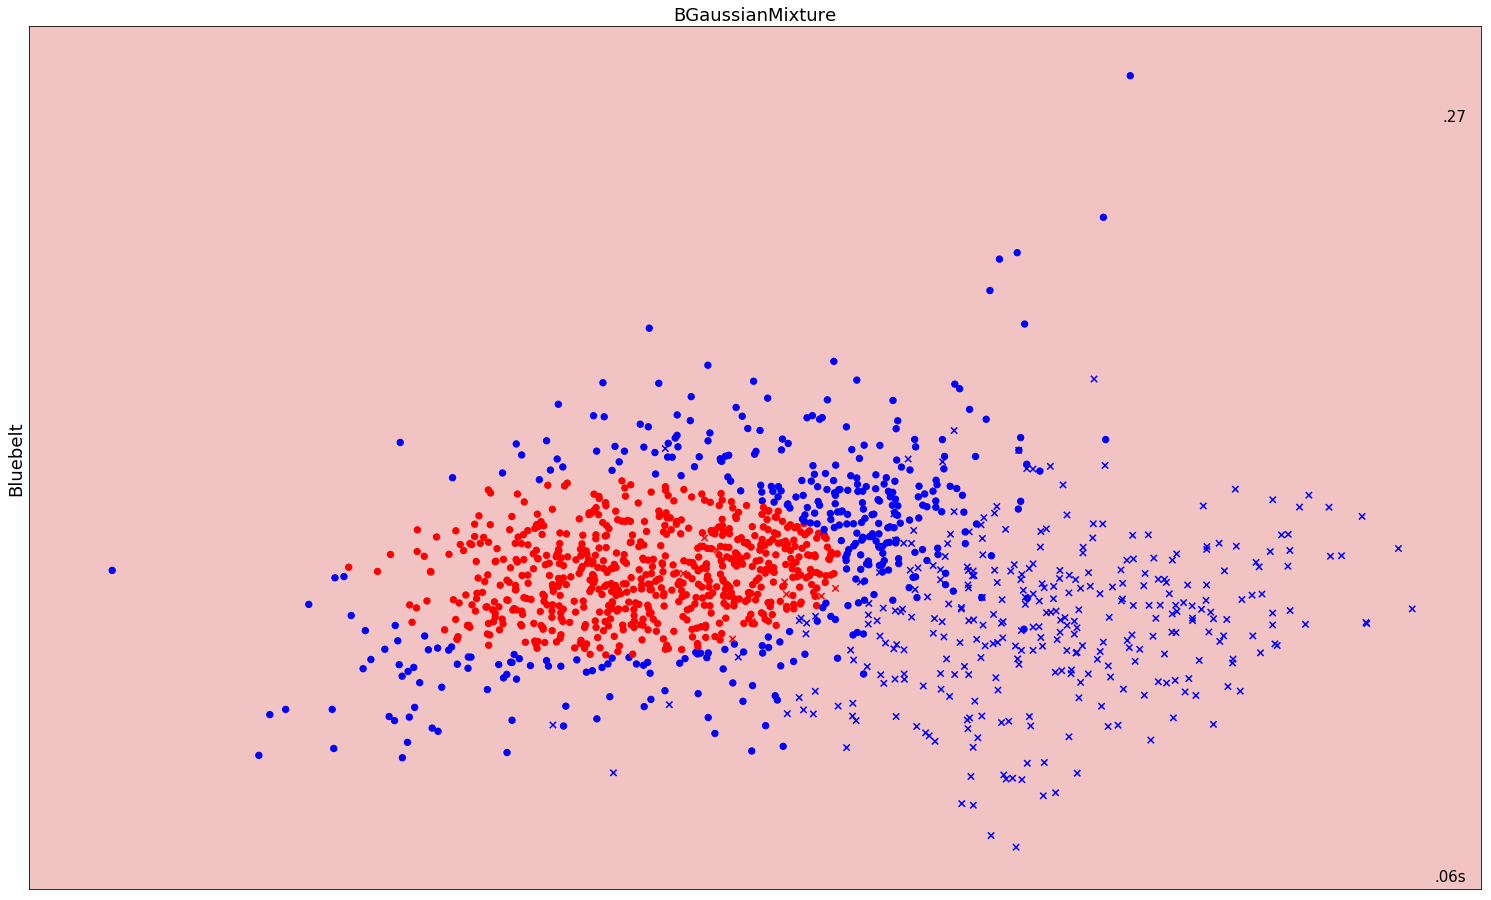

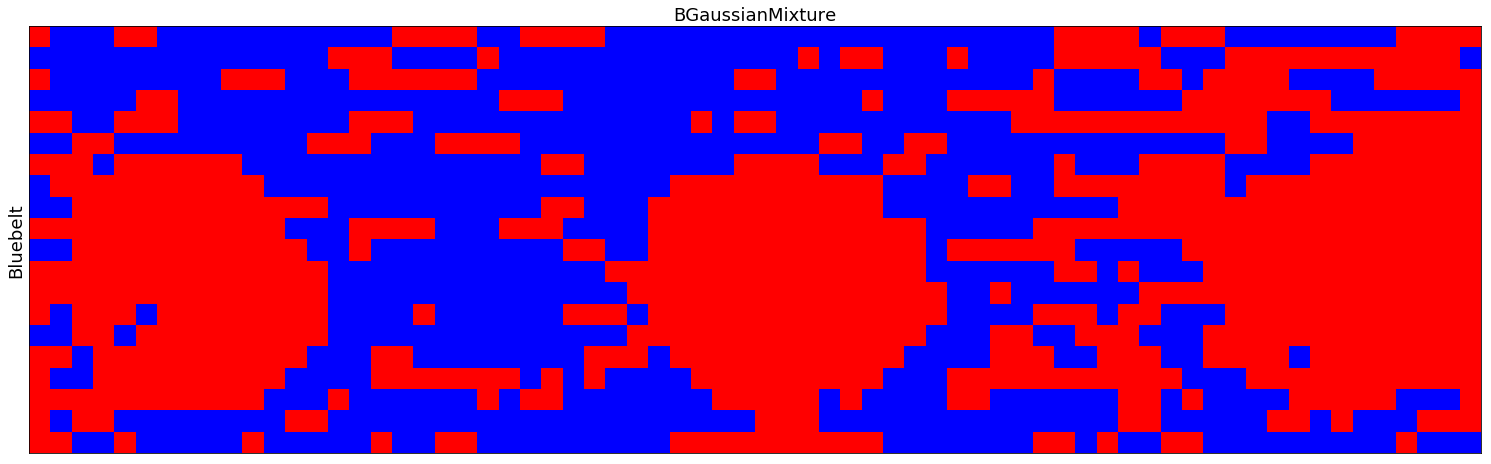

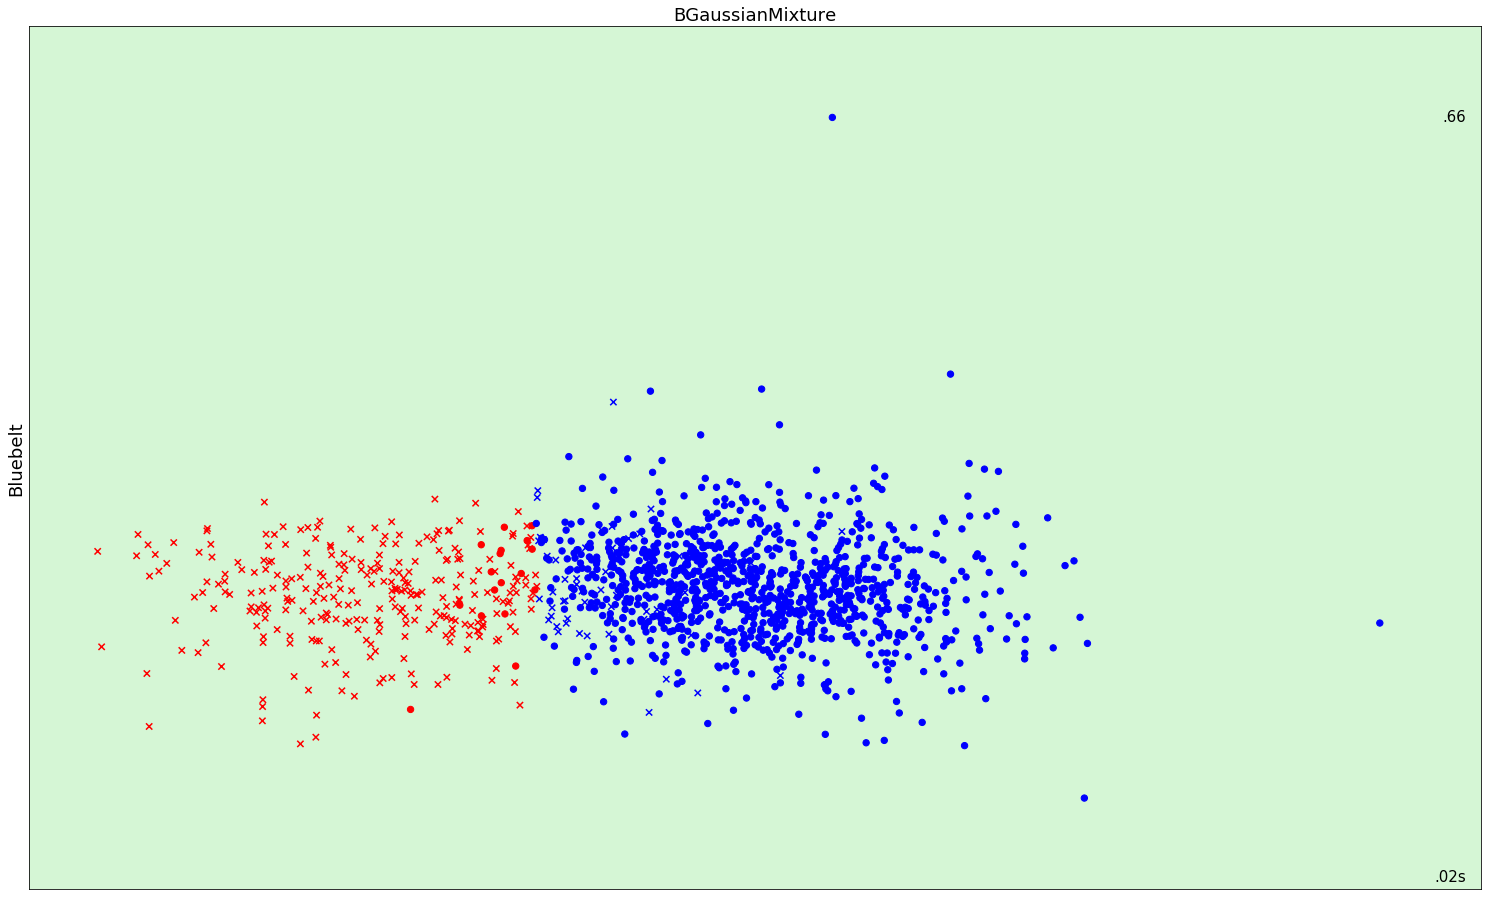

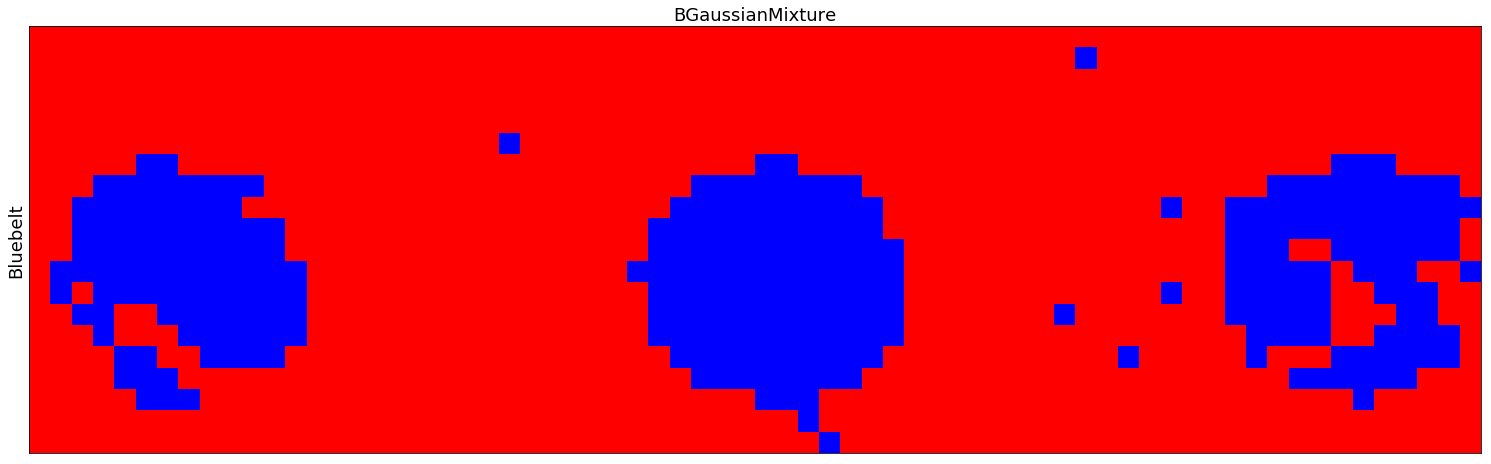

In [76]:
plot_results(1,1,0,return_vs=0,return_bars=1,mode='gauss',red='nmf',dinds=[2],cinds=[10])
plot_results(1,1,0,return_vs=0,return_bars=1,mode='gauss',red='ica',dinds=[2],cinds=[10])
plot_results(1,1,0,return_vs=0,return_bars=1,dinds=[2],cinds=[10])

In [ ]:
fname = '{}{}.txt'.format(section,subsection)
subsection += 1

These figures show bluebelt seperated using the the three dimensional reduction methods using a bGMM model for clustering. bGMM was used since it has the highest score averaged over all of the reduction methods. One can see that NMF does not result in a clean seperation in the data and thus had a poor result using bGMM. Similarly the seperation using the ICA was more complete but did not approach the PCA in terms of completeness.

We can also add the spacial data to the features and then try the dimensional reduction, but first we must normalize and put the mean to zero in the spatial data, adding this we get:

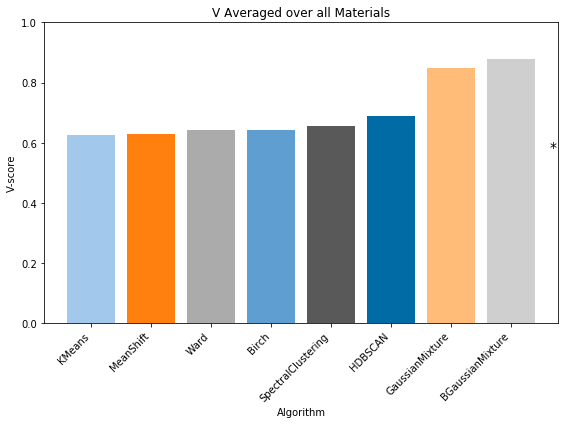

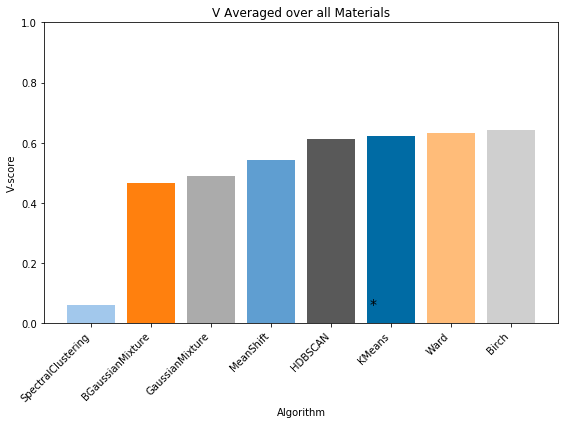

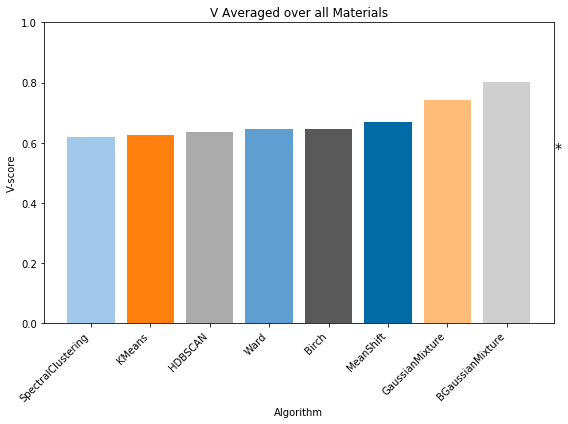

In [23]:
bars_nmf = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='all',red='nmf',dinds=[0,4])
bars_ica = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='all',red='ica',dinds=[0,4])
bars_pca = plot_results(0,0,0,1,return_vs=0,return_bars=1,mode='pca',dinds=[0,4])

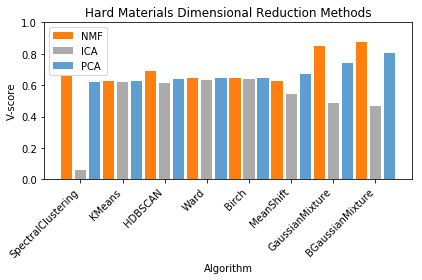

In [24]:
compare_3(bars_nmf,bars_ica,bars_pca,title='Hard Materials Dimensional Reduction Methods',leg=['NMF','ICA','PCA'])

In [ ]:
fname = '{}{}.txt'.format(section,subsection)
subsection += 1

We can see that NMF has a lot of success in the seperation of the different materials if the materials are hard. In fact we see that for hard materials NMF is the best method in terms of V-measure with a V-measure of 0.92 in glass and 0.83 in steel using the bGMM clustering method.

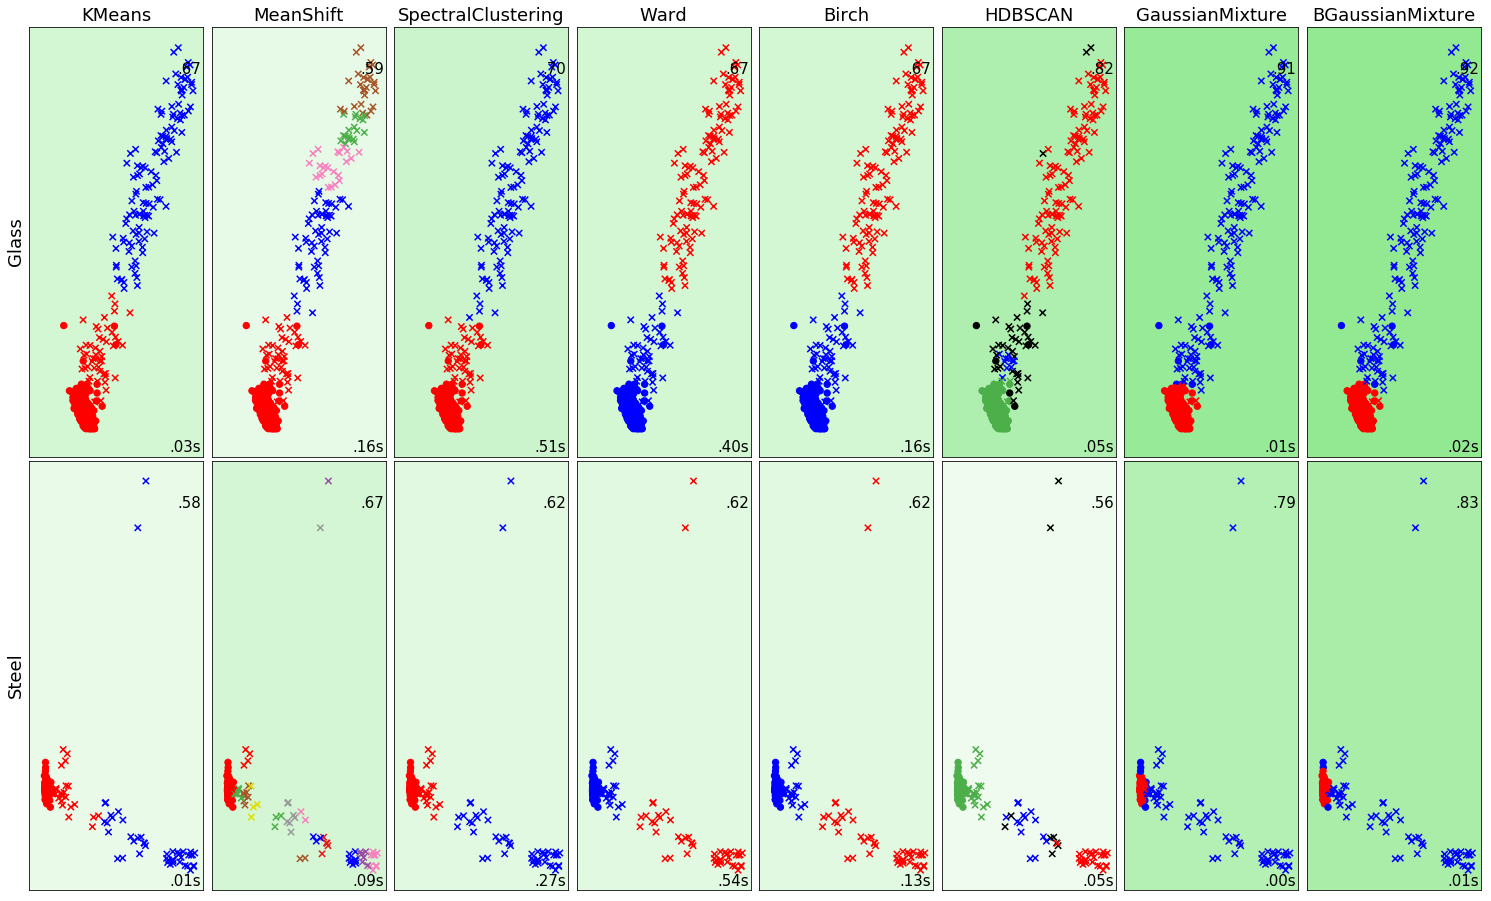

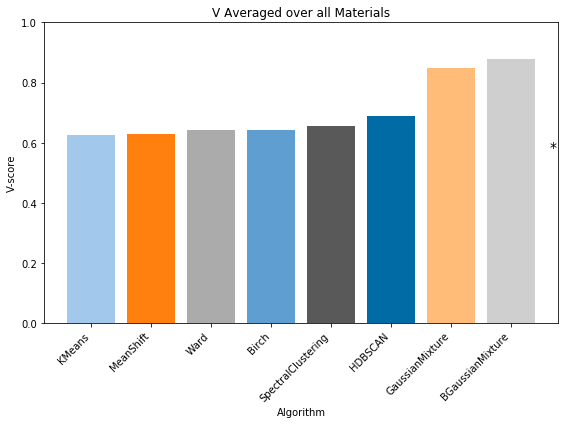

In [25]:
bars_nmf = plot_results(1,0,0,1,return_vs=0,return_bars=1,mode='all',red='nmf',dinds=[0,4])


### Comparison of soft and hard Materials

In [ ]:
fname = '{}{}.txt'.format(section,subsection)
subsection += 1

Continuing our examination of the difference between the soft and hard materials that we started in the above section one can see a full comparison below using PCA as the dimensional reduction method as it was shown to be the best on average.

In [7]:
bars_hard = plot_results(0,0,0,1,return_vs=0,return_bars=1,dinds=[0,4],out=False)
bars_soft = plot_results(0,0,0,1,return_vs=0,return_bars=1,dinds=[1,2,3],out=False)

BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [5]:
compare_2(bars_hard,bars_soft,title='V Measure Hard and Soft Tissues',leg=['hard','soft'])

NameError: name 'bars_hard' is not defined

In [ ]:
fname = '{}{}.txt'.format(section,subsection)
subsection += 1

Looking at figure \ref{???} one immediatly sees two things: Firstly that the hard tissues are on average easier to cluster by all of the clustering algorithms as expected due to the different in density relative to the PMMA. Secondly, one can see that we have a clean winner in terms of clustering algorithms as bGMM holds the highest V-measure for both soft and hard tissues. Thus one can recommend the use of bGMM as the clustering method of choice for spectral imaging. The V-measure for bGMM was seen to be 0.69 for the soft tissues and 0.80 for the hard tissues.

### Dual and Single Energy Comparison

When using spectral imaging it is important to quantify the benefits of the extra information over that of conventional single energy integrated imaging and dual energy imaging. In figure \ref{???} one sees the results of the comparison between single, dual and spectral imaging.

In [40]:
%matplotlib inline

bars_se = plot_results(0,0,0,1,mode='se',return_vs=0,return_bars=1,out=False)
bars_de = plot_results(0,0,0,1,mode='de',return_vs=0,return_bars=1,out=False)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 172 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 179 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 171 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Prog

BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

BIC got higher
BIC got higher
BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [41]:
bars_pc = plot_results(0,0,0,1,return_vs=0,return_bars=1,out=False)

BIC got higher
BIC got higher
BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

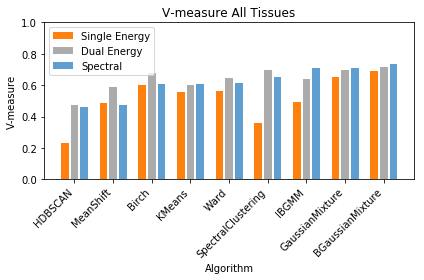

In [56]:
compare_3(bars_se,bars_de,bars_pc,title='V-measure All Tissues',savefig=True,fname='../../clustering_figures/energy_comparison.png')

FigureCanvasNbAgg()

We can see that the spectral imaging and dual energy imaging have a slight advantage over single energy imaging. Again looking at the V Meaure for the bGMM since it is the top performing algorithm we see that spectral imaging has on average a score of 0.73 trailed by dual energy at 0.69 and single energy at 0.67. Looking at these numbers it seems that perhaps a 5% gain in V-meaure over dual energy is not worth the cost of spectral detectors however when looking at the performance seperating hard and soft tissues we see a different story.

In [46]:
plt.style.use('default')
bars_se = plot_results(0,0,0,1,mode='se',return_vs=0,return_bars=1,out=False)
bars_de = plot_results(0,0,0,1,mode='de',return_vs=0,return_bars=1,out=False)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 172 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 179 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 171 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 169 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packa

In [47]:
bars_pc = plot_results(0,0,0,1,return_vs=0,return_bars=1,out=False)

In [49]:
compare_3(bars_se,bars_de,bars_pc,title='V measure Averaged',savefig=True,fname='../../clustering_figures/all_comparison.png')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

Figure \ref{???} shows that although on average the gain is quite marginal between spectral and other energy combination when it comes to soft materials over all of the different clustering methods. This gain is quite substantial, for instance the bGMM for dual energy has a 21\% gain over dual energy jumping from 0.57 to 0.69.

In [52]:
bars_se = plot_results(0,0,0,1,mode='se',return_vs=0,return_bars=1,dinds=[0,4],out=False)
bars_de = plot_results(0,0,0,1,mode='de',return_vs=0,return_bars=1,dinds=[0,4],out=False)
bars_pc = plot_results(0,0,0,1,return_vs=0,return_bars=1,dinds=[0,4],out=False)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 172 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 196 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


In [53]:
compare_3(bars_se,bars_de,bars_pc,title='V measure Hard Tissues',savefig=True,fname='../../clustering_figures/hard.png')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

We see that in the hard material case we have much worse performance of the spectral detector relative to the single and dual energy case. This is understandable since in the case of hard materials the pixels can be linearly seperated based on their density alone and the attenuation of the materials as a function of energy is redundant information as the two materials are already seperable in one dimension. In fact, the seperation of the energy bins incurres a cost of worse photon statistics. If we approximate the fit as the result of $n$ poisson variables then the noise for a fit using $n$ bins of equal fluence will for the worst case have $\sqrt{n}$ more noise if the bins are treated independantly. In this work the bGMM has a 11% reduction in V measure as compared to the single energy case with a value of 0.89 as compared to 0.802. Interestingly, comparing this value to the NMF result in figure \ref{???} we note that in fact the NMF with the spectral imaging produces a higher V measure on the steel than the single energy image and a slightly lower value on the glass, although still higher than the values for the glass using PCA spectral imaging.

### Measure of Number of Bins

An important note in this work is that many of the algorithms take as a parameter the number of bins to be used in the fit. There are multiple metrics for determining the number of bins for various algorithms. Since bGMM was seen to perform the best on the dataset we will focus on methods for determining the number for this algorithm.

AIC was used as the determining factor for the number of bins. A maximum number of bins was set to two for this study as the main differentiation we are looking for is between one and two materials. However it is possible to allow more bins for looking at a larger variety of materials.

In [28]:
aic_2 = plot_results(0,0,0,1,cinds=[9],return_AIC=True,out=False)
aic_1 = plot_results(0,0,0,1,cinds=[9],algo_params={'n_clusters': 1},return_AIC=True,out=False)

In [29]:
compare_2(aic_2,aic_1,title='AIC for 1 and 2 clusters',leg=['2 Clusters','1 Cluster'],algo=False)

FigureCanvasNbAgg()

In [32]:
aic_2 = plot_results(0,0,0,1,cinds=[9],dinds=[0,1,2,3,4,5],return_AIC=True,out=False,algo_params={})
aic_1 = plot_results(0,0,0,1,cinds=[9],dinds=[0,1,2,3,4,5],algo_params={'n_clusters': 1},return_AIC=True,out=False)

In [46]:
aic_2 = plot_results(0,0,0,1,cinds=[10],dinds=[0,1,2,3,4,5],return_weights=True,out=False)

In [50]:
weight_0 = np.asarray(aic_2)[:,0]
weight_1 = np.asarray(aic_2)[:,1]
compare_2(weight_0,weight_1,title='AIC for 1 and 2 clusters',leg=['2 Clusters','1 Cluster'],algo=False)

FigureCanvasNbAgg()

As one can see above for all of the materials it is seen that it is preferable to the two energy approach.

### Real Data

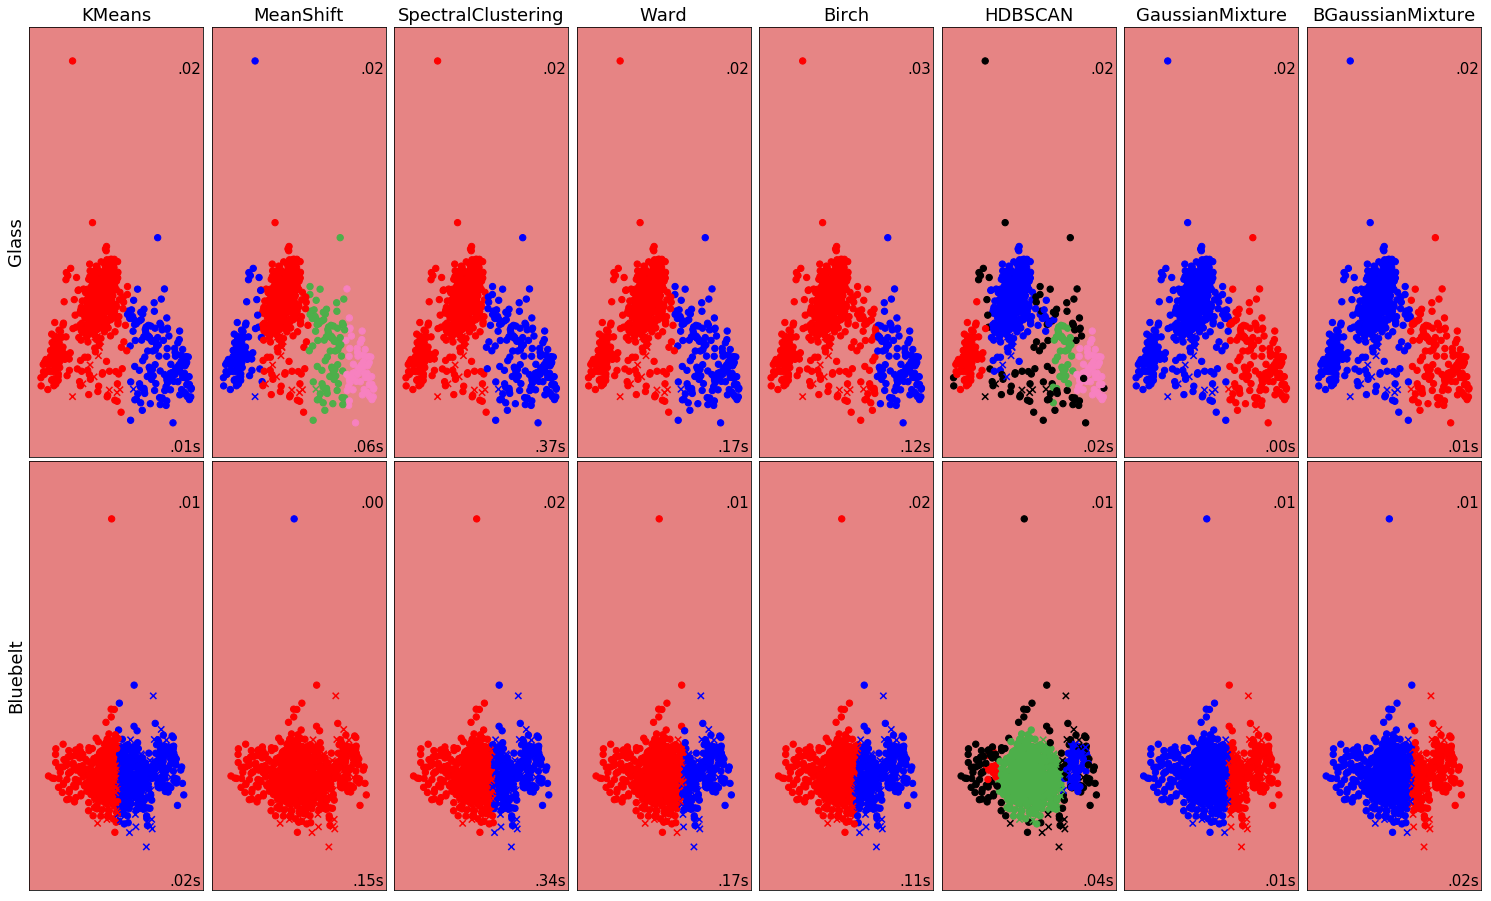

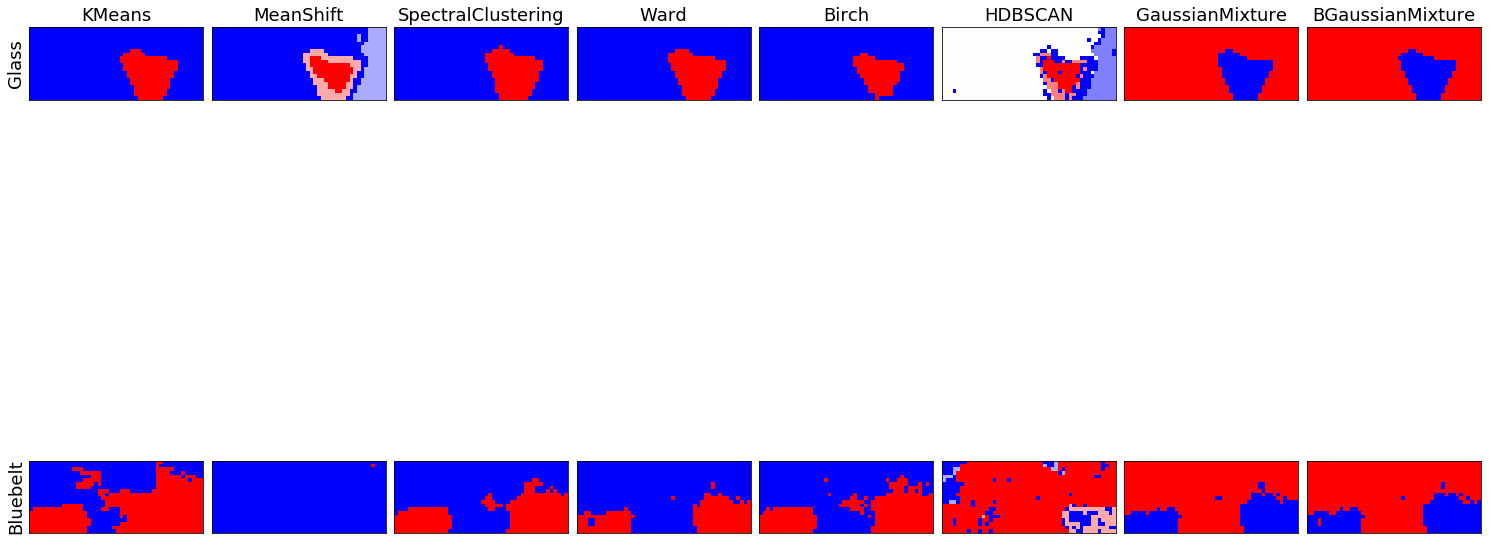

In [129]:
plot_results(1,1,0,fake=False)

The above image is the seperation 

In [67]:
from IPython.display import HTML, display

data = [np.mean(bars_se,0),np.mean(bars_de,0),np.mean(bars_pc,0)
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

In [50]:
np.mean(bars_se,0)

array([0.52454242, 0.34701285, 0.21311304, 0.50097276, 0.49058416,
       0.32251711, 0.66968022, 0.67002609])

In [62]:
(0.69-0.568)/0.568

0.21478873239436622

In [74]:
bars_pc

[array([0.67690581, 0.66419897, 0.62436189, 0.67690581, 0.67690581,
        0.71399662, 0.76517477, 0.79270167]),
 array([0.57321049, 0.67293471, 0.6151895 , 0.6151895 , 0.6151895 ,
        0.56085799, 0.71994535, 0.81162428])]

In [126]:
68*10

680

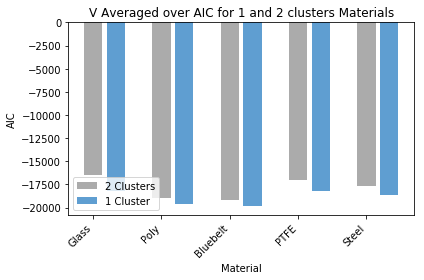

In [16]:
compare_2(aic_2,aic_1,title='AIC for 1 and 2 clusters',leg=['2 Clusters','1 Cluster'],algo=False)

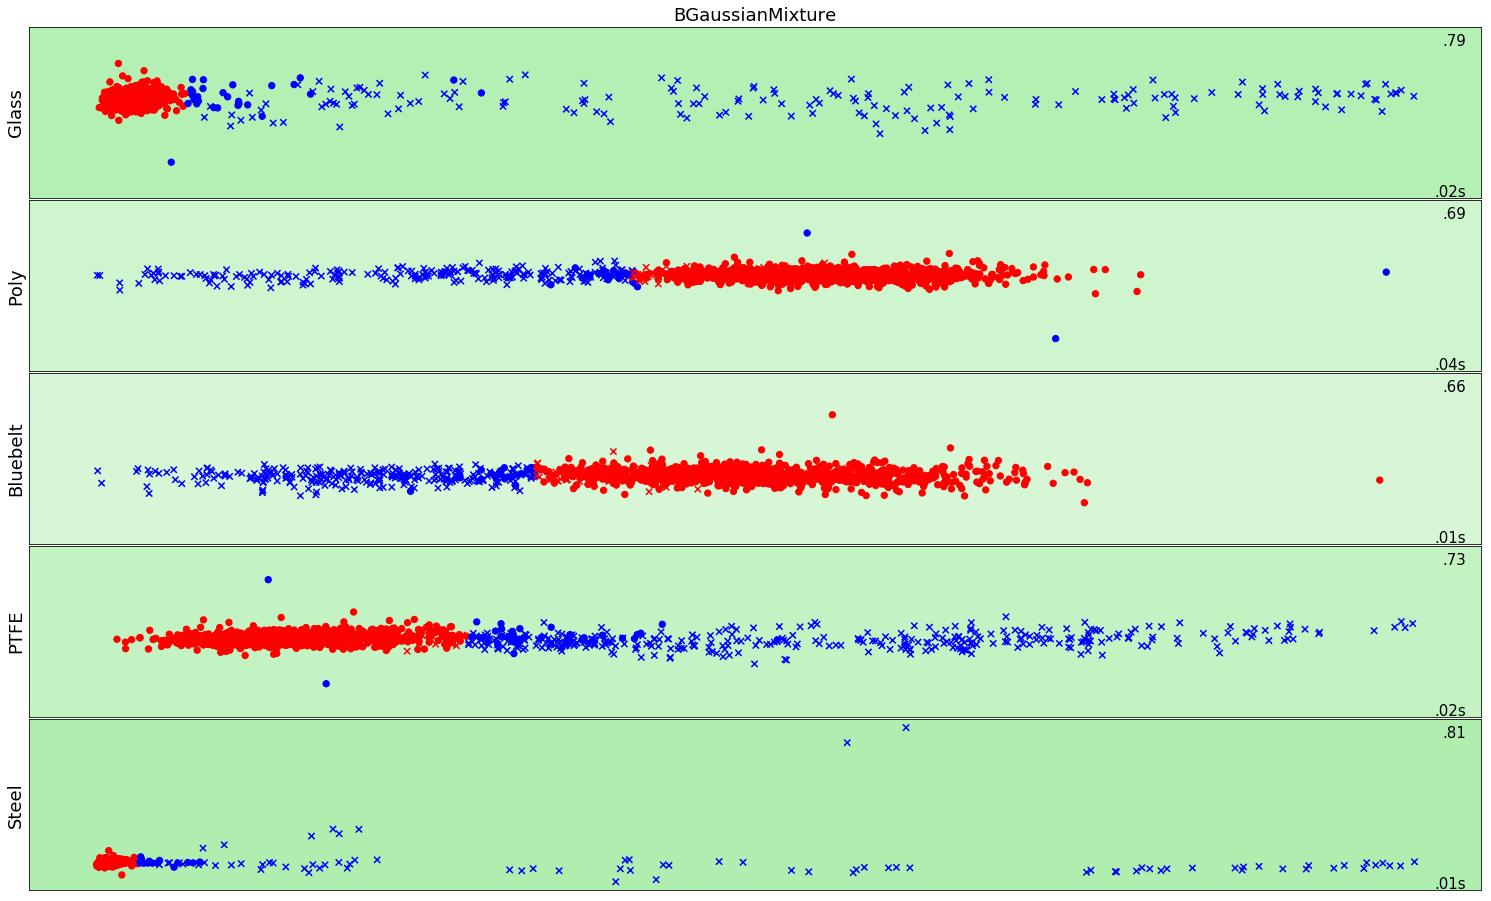

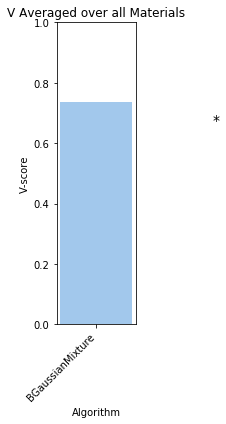

In [19]:
plot_results(1,0,0,1,cinds=[10],algo_params={'ct': 'spherical'})

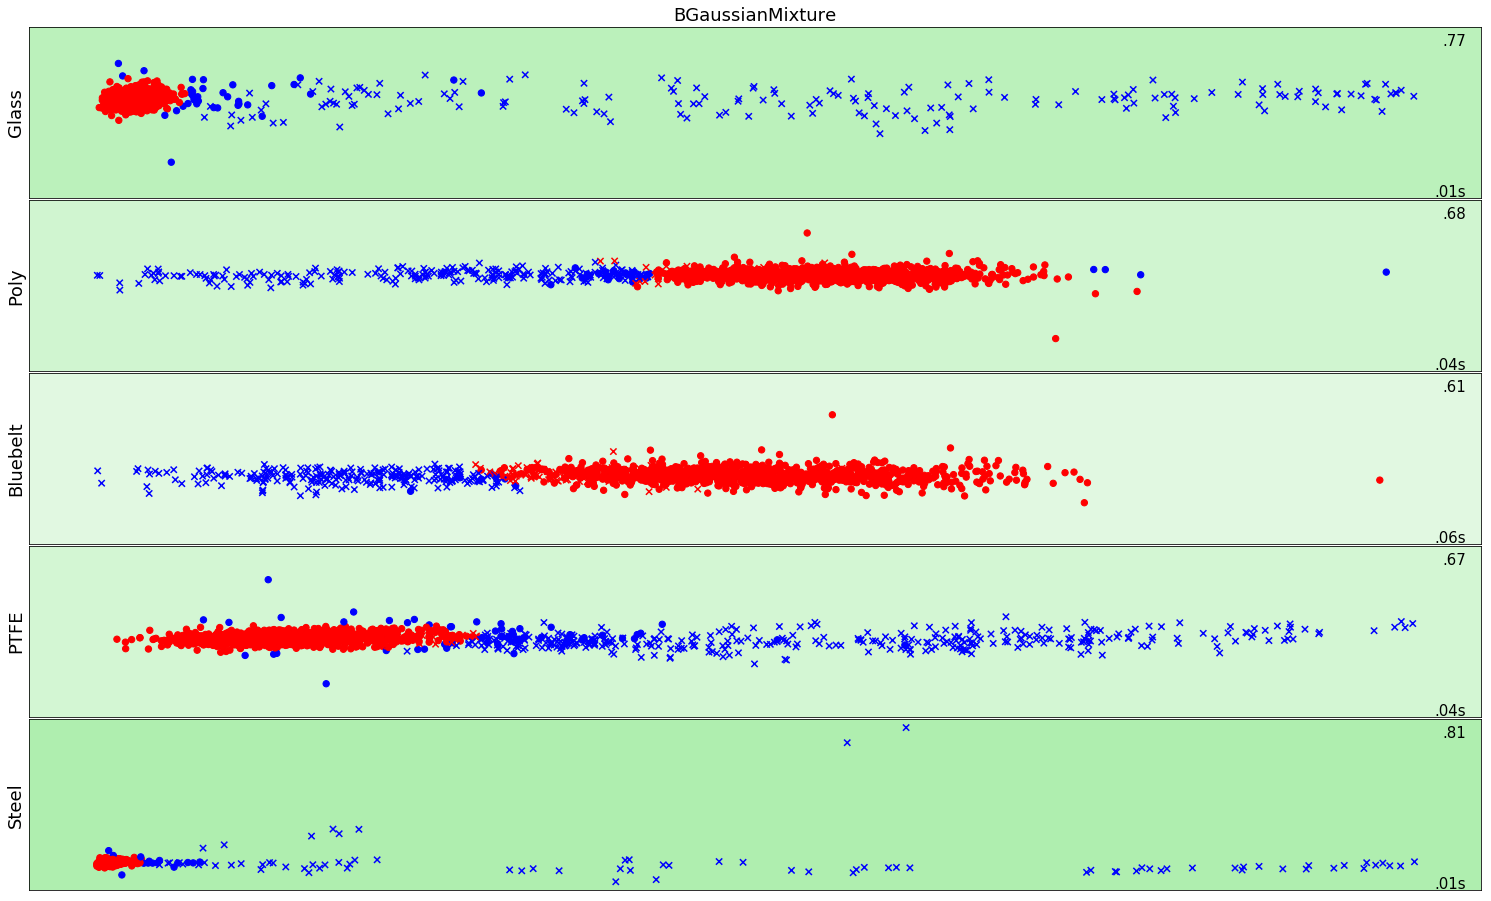

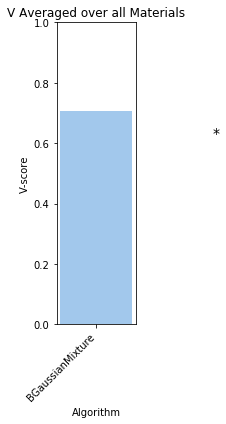

In [20]:
plot_results(1,0,0,1,cinds=[10],algo_params={'ct': 'full'})

### Filtering of the Data

To better fit the data a new method was introduced to reduce noise and eliminate outliers that would show up positive on the scan. When scanning one would not be concerned with contaminants on the order of 1-5 pixels as these could likely be the product of noise and lead to false positives. The question being what size of contaminant do we wish to recognize since the probability of a random cluster of noisy points in the data is high we think this should be a relatively large amount. For small groups of points in the image this method will likely interpolate them into the background. But for larger groups of points in the image, this method will further seperate the clusters. Thus we present a method that is much more robust in that it will eliminate redundant clusters if a cluster is not dense and it's points are at the edge of it's gaussian distribution. However, if the two gaussian mixed models contain real gaussian distribution this methods reduces variance in the mixtures and successfully reasigns many points at the edge of the cluster.

In [ ]:
plt.quiver()

In [6]:
import pcpursuit

In [22]:
M = loadmat('allbb.mat')['Z'][:,:]

L, S, (u, s, v) = pcpursuit.pcp(M, maxiter=200, verbose=True, svd_method="exact")


mu = 1.2294483044119715
Iteration 0: error=4.572e-02, rank=1, nnz=14, time=9.968e-04
Iteration 1: error=1.100e-02, rank=1, nnz=113, time=0.000e+00
Iteration 2: error=9.704e-03, rank=1, nnz=334, time=9.964e-04
Iteration 3: error=8.452e-03, rank=1, nnz=589, time=9.995e-04
Iteration 4: error=7.333e-03, rank=1, nnz=881, time=9.966e-04
Iteration 5: error=6.484e-03, rank=1, nnz=1174, time=9.961e-04
Iteration 6: error=5.725e-03, rank=1, nnz=1468, time=0.000e+00
Iteration 7: error=5.101e-03, rank=1, nnz=1712, time=0.000e+00
Iteration 8: error=4.574e-03, rank=1, nnz=1974, time=9.964e-04
Iteration 9: error=4.154e-03, rank=1, nnz=2169, time=0.000e+00
Iteration 10: error=3.770e-03, rank=1, nnz=2367, time=0.000e+00
Iteration 11: error=3.441e-03, rank=1, nnz=2549, time=0.000e+00
Iteration 12: error=3.148e-03, rank=1, nnz=2682, time=0.000e+00
Iteration 13: error=2.893e-03, rank=1, nnz=2825, time=9.978e-04
Iteration 14: error=2.596e-03, rank=2, nnz=2959, time=9.990e-04
Iteration 15: error=2.310e-03, r

Iteration 141: error=9.247e-05, rank=2, nnz=4881, time=9.971e-04
Iteration 142: error=9.176e-05, rank=2, nnz=4884, time=9.985e-04
Iteration 143: error=9.087e-05, rank=2, nnz=4886, time=9.971e-04
Iteration 144: error=8.981e-05, rank=2, nnz=4891, time=9.985e-04
Iteration 145: error=8.826e-05, rank=2, nnz=4892, time=0.000e+00
Iteration 146: error=8.712e-05, rank=2, nnz=4893, time=9.973e-04
Iteration 147: error=8.649e-05, rank=2, nnz=4893, time=9.968e-04
Iteration 148: error=8.603e-05, rank=2, nnz=4894, time=0.000e+00
Iteration 149: error=8.496e-05, rank=2, nnz=4899, time=9.980e-04
Iteration 150: error=8.381e-05, rank=2, nnz=4903, time=0.000e+00
Iteration 151: error=8.268e-05, rank=2, nnz=4906, time=0.000e+00
Iteration 152: error=8.168e-05, rank=2, nnz=4908, time=0.000e+00
Iteration 153: error=8.073e-05, rank=2, nnz=4909, time=0.000e+00
Iteration 154: error=7.981e-05, rank=2, nnz=4914, time=9.980e-04
Iteration 155: error=7.907e-05, rank=2, nnz=4914, time=9.973e-04
Iteration 156: error=7.86

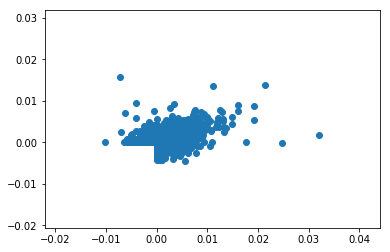

In [47]:
plt.figure()
plt.scatter(S[:,0],S[:,1])
# plt.plot(S)

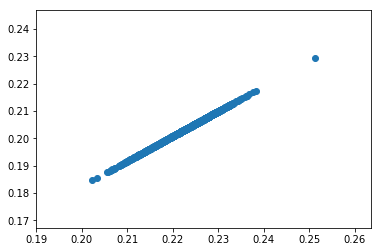

In [51]:
plt.figure()
plt.scatter(L[:,0],L[:,1])

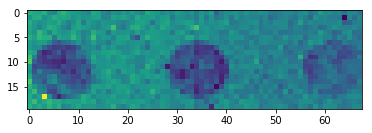

In [52]:
plt.imshow(np.reshape(L[:,1], (20,68), order="F"))

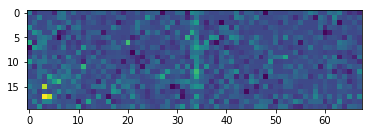

In [53]:
plt.imshow(np.reshape(S[:,1], (20,68), order="F"))

Populating the interactive namespace from numpy and matplotlib


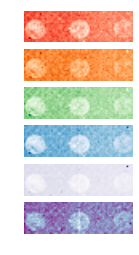

In [72]:
%pylab inline
plt.figure()

n = 6
plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,5], (20,68), order="F"),cmap='BuPu')
plt.axis('off')


plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,4], (20,68), order="F"),cmap='Purples')
plt.axis('off')

plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,3], (20,68), order="F"),cmap='Blues')
plt.axis('off')

plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,2], (20,68), order="F"),cmap='Greens')
plt.axis('off')

plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,1], (20,68), order="F"),cmap='Oranges')
plt.axis('off')


plt.subplot(6,1,n)
n -= 1
plt.imshow(np.reshape(M[:,0], (20,68), order="F"),cmap='Reds')
plt.axis('off')
plt.savefig('reds.png')

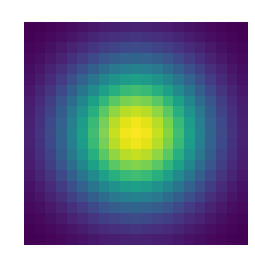

In [75]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

import matplotlib.pyplot as plt
plt.imshow(gkern(21), interpolation='none',cmap='viridis')
plt.axis('off')
plt.title('Gaussian filter and cropping')
plt.savefig('gauss.png')

In [48]:
24*72

1728

In [142]:
X = FastICA(n_components=2).fit_transform(M)

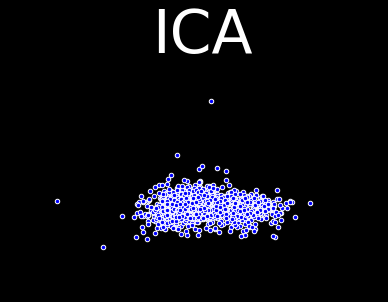

In [143]:
mpl.style.use('dark_background')
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title('ICA',fontsize=60)
plt.axis('off')
plt.savefig('ica.png',bbox_inches='tight')

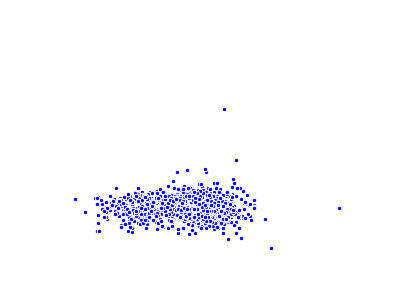

In [76]:
X = PCA(n_components=2).fit_transform(M)

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title('PCA',fontsize=60)
plt.axis('off')
plt.savefig('pca.png',bbox_inches='tight')

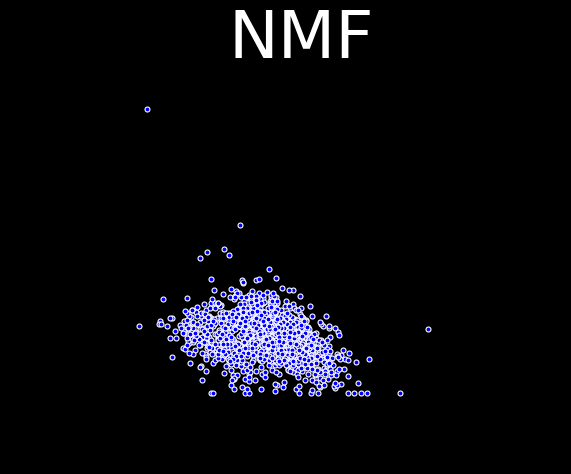

In [71]:
X = NMF(n_components=2).fit_transform(M)

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title('NMF',fontsize=60)
plt.axis('off')
plt.savefig('nmf.png',bbox_inches='tight')

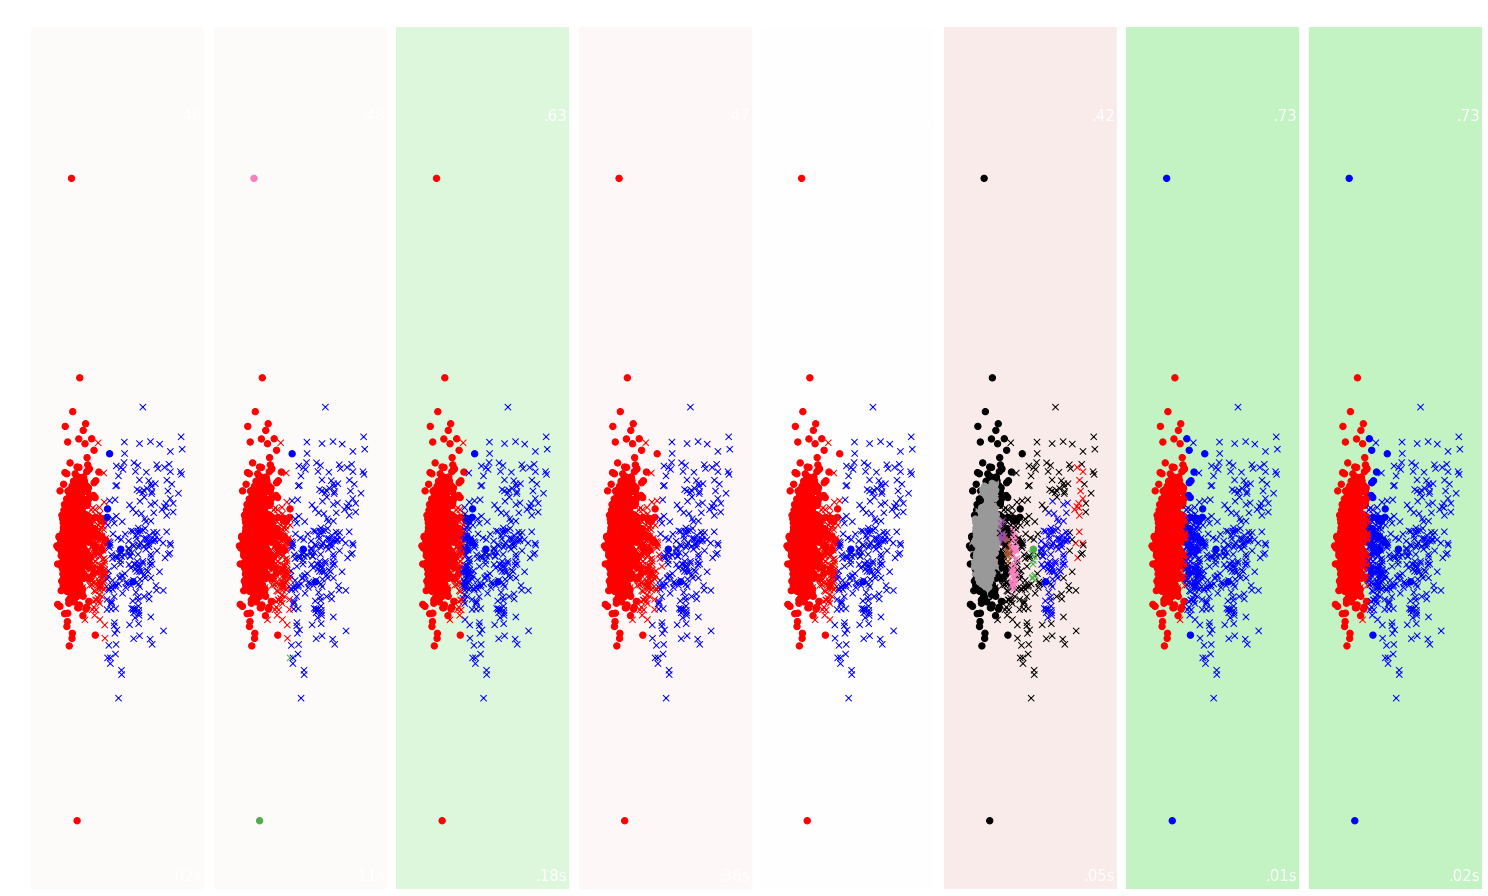

In [77]:
plot_results(1,0,0,dinds=[3])

In [140]:
def plot_results_local(sc=0,sr=0,sv=1,sv2=0,srs=0,mode=[],w_positions=False,scale=False,algo_params=[],rng=10,cinds=[0,2,3,4,7,8,9,10],return_vs=0,return_bars=0,dinds=[0,1,2,3,4],save=False,title='misc',red=[], out=True, return_AIC=False,fake=True, **kwargs
):
    
    '''
    sc: bool
    show clusters plot
    sr: bool
    show reconstruction plot
    sv: bool
    show vscores
    mode: string
    [] = pca, 'all'= all, 'de' = dual energy,'se' = integrating detector 
    W_position: bool
    Add positions to the vectors
    scale: bool
    Rescale the input, this is important if you add the position data
    default_base: dict
    Parameters for the clustering algorithms
    rng: int
    seed
    cinds: list
    which clustering methods to try
    red: string
    Which demensional REDuction 'ica', 'nmf' or 'tsne'
    '''

    np.random.seed(rng)


    # ============
    # Set up cluster parameters
    # ============
    if sc:
        plt.figure(1,figsize=(9 * 2 + 3, 12.5))
        plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                            hspace=.01)
    if sr:
        plt.figure(2,figsize=(9 * 2 + 3, 12.5))
        plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                            hspace=.01)
    if srs:
        plt.figure(3,figsize=(9 * 2 + 3, 12.5))
        plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                            hspace=.01)


    plot_num = 1


    # This dictionary defines the colormap
    cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

            'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.0, 0.0)),  # no green at 1

            'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.0, 0.0))   # no blue at 1
           }

    # Create the colormap using the dictionary
    P = color.LinearSegmentedColormap('GnRd', cdict)

    homo, comp, vs, idata, ialgo = [],[],[],[],[]
    
    if fake:
        data = (('glass','Glass'),('pp','Poly'),('bb','Bluebelt'),('ptfe','PTFE'),('steel','Steel'
                ))
        datasets2 = [data[j] for j in dinds]
    else:
        datasets2 = (('chick_glass','Glass'),('chick_bluebelt','Bluebelt'))  

    default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -60,
                'n_neighbors': 2,
                'n_clusters': 2,
                'linkage': 'ward',
                'affinity': "nearest_neighbors",
                'assign_labels':'kmeans',
                'min_samples':10,
                'ct':'spherical',
                'branching':19,
                'threshold':0.0001,
                'metric':'minkowski',
                'asc':False,
                'p':2,
                'mcs':10,
                'nc':2}
    
    aic = []
    
    for i_dataset, (dataset,dat_name) in enumerate(datasets2):

        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)
        
#         if outlier_detect:
#             X = loadmat('2'+dataset)['Z']
            

        if mode == 'de':
            X = loadmat('all'+dataset)['Z'][:,1:]
            X = np.column_stack((np.sum(X[:,1:3],1),np.sum(X[:,4:],1)))
        elif mode == 'se':
            X = loadmat('all'+dataset)['Z'][:,0]
            X = np.reshape(X, (20*68,1), order="F")
        elif mode == 'all':
            X = loadmat('all'+dataset)['Z'][:,1:]
        elif mode == 'small':
            X = loadmat('small_'+dataset)['Z'] 
        elif mode == 'gauss':
            X = loadmat('all'+dataset)['Z'][:,1:]
            for jj in range(0,5):
                r2 = np.reshape(X[:,jj], (20,68), order="F")
                X[:,jj] = np.reshape(gaussian_filter1d(r2,sigma=1),20*68,order="F")
            X = PCA(n_components=2).fit_transform(X)            
        else:
            X = loadmat('2'+dataset)['Z']
    
        label_true = loadmat('2'+dataset+'_mask')['BW'] 
        
        if not fake:
            X = X[400:,:].copy()
            label_true = label_true[400:].copy()

        if w_positions:
            xx,yy = np.meshgrid(range(68),range(20))        
            x = np.reshape(xx, (20*68,1), order="F")
            y = np.reshape(yy, (20*68,1), order="F")
            X = np.concatenate((X,x,y),axis = 1)

        if scale:
            X = StandardScaler().fit_transform(X)
            
        if red == 'ica':
            X = FastICA(n_components=params['nc'],whiten=True).fit_transform(X)
        if red == 'icapca':
            X = FastICA(n_components=5).fit_transform(X)
            X = PCA(n_components=params['nc']).fit_transform(X)                
        if red == 'tsne':
            X = TSNE(n_components=params['nc']).fit_transform(X)
        if red == 'nmf':
            X = NMF(n_components=params['nc']).fit_transform(X) 
            
        if red == 'pca':
            X = PCA(n_components=params['nc']).fit_transform(X)  
        if red == 'spec':
            X = SpectralEmbedding(n_components=3).fit_transform(X)

            
        # estimate bandwidth for mean shift
#         if mode == 'se':
#             bandwidth = None
#         else:
        bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
        
#         if mode != 'se':
            # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(
                    X, n_neighbors=params['n_neighbors'], include_self=False)
        connectivity = 0.5 * (connectivity + connectivity.T)
#         else:
#             connectivity = None

        # ============
        # Create cluster objects
        # ============
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
        ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage=params['linkage'],
            connectivity=connectivity)
        spectral = cluster.SpectralClustering(
            n_clusters=params['n_clusters'], eigen_solver='arpack',
            affinity=params['affinity'],assign_labels=params['assign_labels'])
        dbscan = cluster.DBSCAN(eps=params['eps'],min_samples=params['min_samples'],metric=params['metric'],p=params['p'])
        affinity_propagation = cluster.AffinityPropagation(
            damping=params['damping'], preference=params['preference'])
        average_linkage = cluster.AgglomerativeClustering(
            linkage="complete", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
        birch = cluster.Birch(n_clusters=params['n_clusters'],branching_factor=params['branching'],
                             threshold=params['threshold'])
        gmm = mixture.GaussianMixture(
            n_components=params['n_clusters'], covariance_type=params['ct'])
        bgmm = mixture.BayesianGaussianMixture(
            n_components=params['n_clusters'], covariance_type=params['ct'])
        hdb = hdbscan.HDBSCAN(min_samples=params['min_samples'],min_cluster_size=params['mcs'],metric=params['metric'],allow_single_cluster=params['asc'],p=params['p'], **kwargs)
        
        cinds_all = (
            ('KMeans', two_means),
            ('AffinityPropagation', affinity_propagation),
            ('MeanShift', ms),
            ('SC', spectral),
            ('Ward', ward),
            ('AgglomerativeClustering', average_linkage),
            ('DBSCAN', dbscan),
            ('Birch', birch),
            ('HDBSCAN', hdb),
            ('GMM', gmm),
            ('BGMM', bgmm)
        )

        clustering_algorithms = [cinds_all[j] for j in cinds]

        for i_algorithm, (name, algorithm) in enumerate(clustering_algorithms):

            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the " +
                    "connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning)
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding" +
                    " may not work as expected.",
                    category=UserWarning)
                if hasattr(algorithm, 'condensed_tree_'):
                    pass
                else:
                    algorithm.fit(X)

            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            elif hasattr(algorithm, 'condensed_tree_'):
                y_pred = algorithm.fit_predict(X)
            else:
                y_pred = algorithm.predict(X)
                
            homo1,comp1,vs1 = homogeneity_completeness_v_measure(label_true.squeeze(), y_pred)
            
            if return_AIC:
                if hasattr(algorithm, 'aic'):
                    aic.append(algorithm.aic(X))
            
            if sc:
                plt.figure()

#                 plt.rcParams['axes.facecolor'] = P(1 - vs1,alpha=0.5)
                
                if mean(y_pred[203]) == 1:
                    print(1)
                    y_pred[(y_pred == 1)] == -10
                    y_pred[(y_pred == 0)] == 1
                    y_pred[(y_pred == -10)] == 0

#                 plt.subplot(len(datasets2), len(clustering_algorithms), plot_num)
                if i_dataset == 0:
                    plt.title(name, size=25)
#                 if i_algorithm == 0:
#                     #plt.ylabel(dat_name, size=18)


                colors2 = np.array(list(islice(cycle(['r','b', '#4daf4a',
                                                     '#f781bf', '#a65628', '#984ea3',
                                                     '#999999', '#e41a1c', '#dede00']),
                                              int(max(y_pred) + 1))))

                # add black color for outliers (if any)
                colors2 = np.append(colors2, ["#000000"])
                #import ipdb; ipdb.set_trace()
                X2 = X[label_true.squeeze() == 0,:]
                plt.scatter(X2[:, 0], X2[:,1], facecolor=colors2[y_pred[label_true.squeeze() == 0]])
                
                X2 = X[label_true.squeeze() == 1,:]
                plt.scatter(X2[:, 0], X2[:,1], facecolor=colors2[y_pred[label_true.squeeze() == 1]])#,marker='x')

                plt.xticks(())
                plt.yticks(())
#                 plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
#                          transform=plt.gca().transAxes, size=15,
#                          horizontalalignment='right')
#                 plt.text(.99, .89, ('%.2f' % vs1).lstrip('0'),
#                          transform=plt.gca().transAxes, size=15,
#                          horizontalalignment='right')
                plt.axis('square')
                plt.axis('off')
                plt.savefig('{}.png'.format(name),bbox_inches='tight')
#             if sr | srs:
#                 aa = y_pred[1320]
                
#                 if aa != 0:
#                     y_pred[y_pred == y_pred.min()] = y_pred.max() + 1                    
#                     y_pred[y_pred == aa] = y_pred.min()
            if sr:        
                plt.figure()
            
                y_pred -= 1
                y_pred = abs(y_pred)
                
                if fake:
                    r = np.reshape(y_pred, (20,68), order="F")
                else:
                    r = np.reshape(y_pred, (20,48), order="F")

                plt.subplot(len(datasets2), len(clustering_algorithms), plot_num)
                if i_dataset == 0:
                    plt.title('Clustering Result', size=25)
                plt.imshow(r)
                plt.set_cmap('bwr')
                plt.xticks([])
                plt.yticks([])  
                plt.savefig('{}.png'.format('CR'),bbox_inches='tight')
                
                plt.figure()
                r = np.reshape(label_true, (20,68), order="F")
                    
                plt.subplot(len(datasets2), len(clustering_algorithms), plot_num)
                if i_dataset == 0:
                    plt.title('Ground Truth', size=25)
                plt.imshow(r)
                plt.set_cmap('bwr')
                plt.xticks([])
                plt.yticks([])  
                plt.savefig('{}.png'.format('GT'),bbox_inches='tight')                
#                 if i_algorithm == 0:
#                     plt.ylabel(dat_name, size=25)
            if srs:
                plt.figure(3)
                r = np.reshape(y_pred, (20,68), order="F")
                p = np.reshape(label_true, (20,68), order="F")
                plt.subplot(len(datasets2), len(clustering_algorithms), plot_num)
                # Bin all of the bins to one and zero
                
                r[r == r.min()] = 0
                r[r > r.min()] = 1
                
                if i_dataset == 0:
                    plt.title(name, size=18)
                plt.imshow(abs(p - r))
                plt.set_cmap('gray')
                plt.xticks([])
                plt.yticks([])        
                if i_algorithm == 0:
                    plt.ylabel(dat_name, size=18)
                    
            homo.append(homo1)
            comp.append(comp1)
            vs.append(vs1)

            idata.append(i_dataset)
            ialgo.append(i_algorithm)

            plot_num += 1
    
    if save:
        plt.figure(1)
        plt.savefig('scatter_'+title+'.png')
        plt.figure(2)
        plt.savefig('recon_'+title+'.png')
    
    plt.show()
        
    if sv:
        plt.rcParams['axes.facecolor'] = (0,0,0)    
        vs = np.asarray(vs)
        bars = []
        n_components_range = range(len(clustering_algorithms))
        cv_types = [item[1] for item in datasets2]


        color_iter = cycle(['navy', 'turquoise', 'cornflowerblue',
                                      'darkorange','k'])
        # Plot the BIC scores
        plt.figure(figsize=(8, 6))
        spl = plt.subplot(1, 1, 1)

        for i, (cv_type, pcolor) in enumerate(zip(cv_types, color_iter)):
            xpos = np.array(n_components_range) + .166 * (i - 2)
            bars.append(plt.bar(xpos, vs[i * len(n_components_range):
                                          (i + 1) * len(n_components_range)],
                                width=.166, color=pcolor))
        plt.xticks(n_components_range,[item[0] for item in clustering_algorithms])
        plt.xticks()
        plt.ylim([0, 1])
        plt.title('V score per model')
        xpos = np.mod(vs.argmax(), len(n_components_range)) + .65 +\
            .16 * np.floor(vs.argmax() / len(n_components_range))
        plt.text(xpos, vs.min() * 0.97 + .03 * vs.max(), '*', fontsize=14)
        spl.set_xlabel('Algorithm')
        spl.legend([b[0] for b in bars], cv_types)  
        plt.tight_layout()
        
    if sv2:
        
        vs = np.asarray(vs)
        bars = []
        colors = []
        n_components_range = range(len(clustering_algorithms))
        cv_types = [item[1] for item in datasets2]


        color_iter = cycle(['navy', 'turquoise', 'cornflowerblue',
                                      'darkorange','k'])
        # Plot the BIC scores
        if out:
            plt.figure(figsize=(8, 6))
            plt.rcParams['axes.facecolor'] = (1,1,1)            
            spl = plt.subplot(1, 1, 1)

        for i, (cv_type, pcolor) in enumerate(zip(cv_types, color_iter)):
            xpos = np.array(n_components_range) + 0.166 * (i - 2)
            bars.append( vs[i * len(n_components_range):
                                          (i + 1) * len(n_components_range)])
        
        # import ipdb; ipdb.set_trace()
        [colors.append(colourblind(col)) for col in n_components_range]
        
        bars2 = np.mean(np.asarray(bars),axis=0)
        
        indeces = np.argsort(bars2)
#         import ipdb; ipdb.set_trace()
        bars2.sort()
        clustering_algorithms = [clustering_algorithms[i] for i in indeces]
        
        if out:
            plt.bar(n_components_range,bars2,color=colors)
            plt.xticks(n_components_range,[item[0] for item in clustering_algorithms],rotation = 45, ha="right")
            plt.xticks()
            plt.ylim([0, 1])
            plt.title('V Averaged over all Materials')
            xpos = np.mod(vs.argmax(), len(n_components_range)) + .65 +\
                .16 * np.floor(vs.argmax() / len(n_components_range))
            plt.text(xpos, vs.min() * 0.97 + .03 * vs.max(), '*', fontsize=14)
            spl.set_xlabel('Algorithm')
            spl.set_ylabel('V-score')
            #spl.legend([b[0] for b in bars], cv_types)  
            plt.tight_layout()
        
        if return_bars:
            return bars
    if return_vs:    
        return vs
    if return_AIC:
        return aic

1
1


<Figure size 1512x900 with 0 Axes>

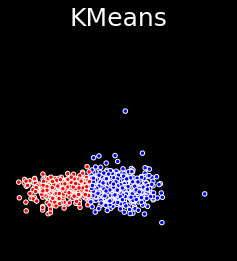

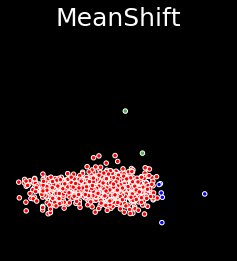

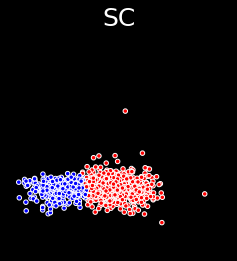

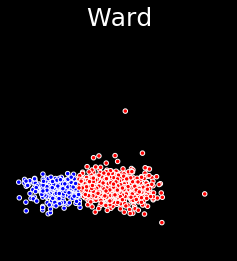

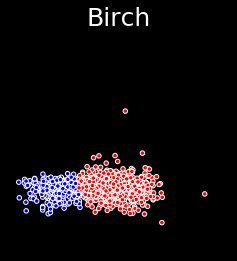

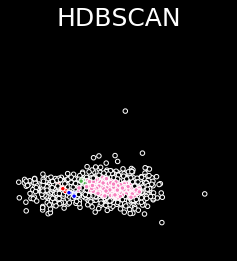

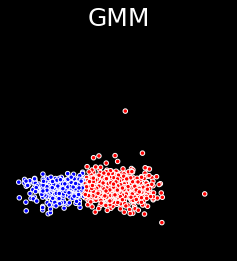

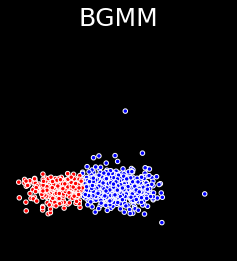

In [123]:
plot_results_local(1,0,0,dinds=[2])

<Figure size 1512x900 with 0 Axes>

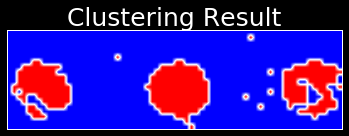

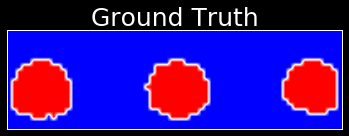

In [141]:
plot_results_local(0,1,0,dinds=[2],cinds=[10],fake=True)

In [27]:
silhouette_analysis('PMMA')

FigureCanvasNbAgg()

For n_clusters = 2 The average silhouette_score is : 0.39428670695132195


FigureCanvasNbAgg()

For n_clusters = 3 The average silhouette_score is : 0.317129068889963


FigureCanvasNbAgg()

For n_clusters = 4 The average silhouette_score is : 0.32946824617267667


FigureCanvasNbAgg()

For n_clusters = 5 The average silhouette_score is : 0.32320341225990734


FigureCanvasNbAgg()

For n_clusters = 6 The average silhouette_score is : 0.31864403864043506


BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher
BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

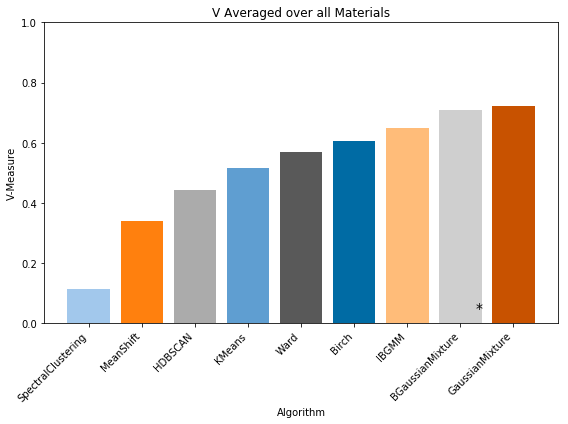

In [49]:
%matplotlib inline
plot_results(0,0,0,1,red='ica',algo_params={'ct':'full'},mode='gauss',passred=True)

BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

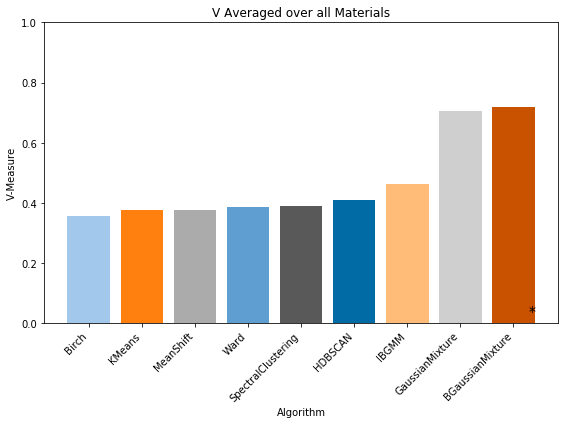

In [50]:
plot_results(0,0,0,1,red='nmf',algo_params={'ct':'full'},mode='gauss',passred=True)

BIC got higher
BIC got higher
BIC got higher
BIC got higher
BIC got higher


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

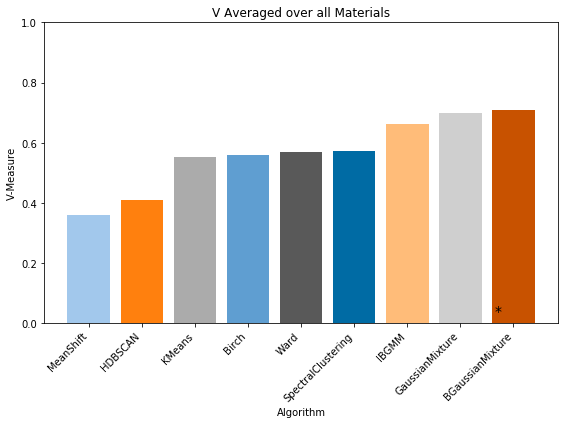

In [51]:
plot_results(0,0,0,1,mode='all',red='pca')